# Les packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

import ast
import ipywidgets as widgets
import pingouin as pg
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

# Importation des données

In [2]:
df = pd.read_csv("data_preprocess2_final.csv")

# Préparation des données pour la modélisation de la consommation énergétique

##  Création du modèle de base

## Variables cibles "SiteEnergyUse(kBtu)" et "TotalGHGEmissions'

## La consommation d'énergie dans le site

In [3]:
df.shape

(6654, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6654 entries, 0 to 6653
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     6654 non-null   object 
 1   PrimaryPropertyType              6654 non-null   object 
 2   Neighborhood                     6654 non-null   object 
 3   YearBuilt                        6654 non-null   int64  
 4   NumberofBuildings                6654 non-null   float64
 5   NumberofFloors                   6654 non-null   float64
 6   PropertyGFATotal                 6654 non-null   int64  
 7   PropertyGFABuilding(s)           6654 non-null   int64  
 8   SecondLargestPropertyUseType     6654 non-null   object 
 9   SecondLargestPropertyUseTypeGFA  6654 non-null   float64
 10  ENERGYSTARScore                  6654 non-null   float64
 11  SiteEnergyUse(kBtu)              6654 non-null   float64
 12  Latitude            

In [5]:
# Features
X1 = df.drop(columns=['SiteEnergyUse(kBtu)','TotalGHGEmissions'], axis = 1)

# Variable cible
#y1 = df['SiteEnergyUse(kBtu)']
y1 = np.log(df['SiteEnergyUse(kBtu)']) # J'ai d'abord faire ça le logarithme et les résultats n'étaient pas satisfaisants.

<AxesSubplot:xlabel='SiteEnergyUse(kBtu)', ylabel='Density'>

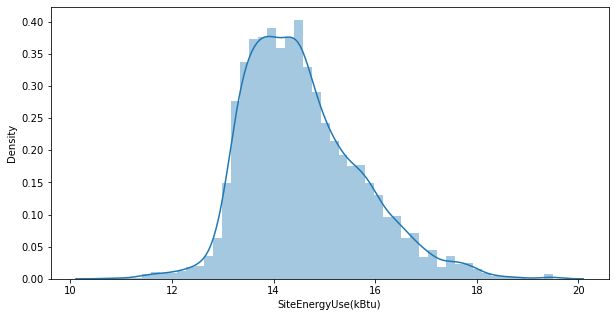

In [6]:
# Visualisation de la variable cible aprés transformation logarithmique
plt.figure(figsize=(10,5)) 
sns.distplot(y1,kde = True)

In [7]:
# La structure des données
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6654 entries, 0 to 6653
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     6654 non-null   object 
 1   PrimaryPropertyType              6654 non-null   object 
 2   Neighborhood                     6654 non-null   object 
 3   YearBuilt                        6654 non-null   int64  
 4   NumberofBuildings                6654 non-null   float64
 5   NumberofFloors                   6654 non-null   float64
 6   PropertyGFATotal                 6654 non-null   int64  
 7   PropertyGFABuilding(s)           6654 non-null   int64  
 8   SecondLargestPropertyUseType     6654 non-null   object 
 9   SecondLargestPropertyUseTypeGFA  6654 non-null   float64
 10  ENERGYSTARScore                  6654 non-null   float64
 11  Latitude                         6654 non-null   float64
 12  Longitude           

In [8]:
# Encodage des données (variables catégorielles)
cat_vars1 = X1.select_dtypes(include=["object"]).columns.to_list()
cat_vars1

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'SecondLargestPropertyUseType',
 'HasParking']

In [9]:
# One Hot Encoding
X1_OHE = pd.get_dummies(data = X1, columns = cat_vars1, drop_first= True)
X1_OHE.head()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,Latitude,Longitude,BuildingType_Multifamily HR (10+),...,SecondLargestPropertyUseType_Residence Hall,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Senior Care Community,SecondLargestPropertyUseType_Social/Meeting Hall,SecondLargestPropertyUseType_Supermarket/Store,SecondLargestPropertyUseType_Swimming Pool,SecondLargestPropertyUseType_Vocational School,SecondLargestPropertyUseType_Warehouse,SecondLargestPropertyUseType_Worship Facility,HasParking_Yes
0,1927,1.0,12.0,88434,88434,0.0,65.0,47.612190,-122.337997,0,...,0,0,0,0,0,0,0,0,0,0
1,1996,1.0,11.0,103566,88502,15064.0,51.0,47.613106,-122.333358,0,...,0,0,0,0,0,0,0,0,0,1
2,1969,1.0,41.0,961990,961990,100000.0,18.0,47.613349,-122.337699,0,...,0,0,0,0,0,0,0,0,0,0
3,1926,1.0,10.0,61320,61320,0.0,1.0,47.614216,-122.336609,0,...,0,0,0,0,0,0,0,0,0,0
4,1980,1.0,18.0,119890,107430,68009.0,67.0,47.613754,-122.340924,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
X1_OHE.shape

(6654, 92)

In [11]:
# Données d'entrainement et de test
seed = 1234
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_OHE,y1,test_size = 0.25, random_state= seed)
print("X1_train shape:", X1_train.shape)
print("X1_test shape:", X1_test.shape)
print("y1_train shape:", y1_train.shape)
print("y1_test shape:", y1_test.shape)

X1_train shape: (4990, 92)
X1_test shape: (1664, 92)
y1_train shape: (4990,)
y1_test shape: (1664,)


In [12]:
print(y1_test)

2540    14.520744
2089    14.166153
1749    14.507020
741     13.643346
358     15.705597
          ...    
2972    14.933480
507     16.416742
2990    14.072735
2187    12.460533
1342    15.173130
Name: SiteEnergyUse(kBtu), Length: 1664, dtype: float64


In [13]:
# Fréquence des classes dans y en transformant la variable cible en DataFrame
pd.DataFrame(y1).value_counts(normalize=True)

SiteEnergyUse(kBtu)
13.572909              0.000301
14.545063              0.000301
13.550520              0.000301
10.698593              0.000150
14.886599              0.000150
                         ...   
13.957782              0.000150
13.957565              0.000150
13.957330              0.000150
13.956969              0.000150
19.505237              0.000150
Length: 6651, dtype: float64

In [14]:
# Fréquence des classes dans y_train
#pd.DataFrame(yval_train).value_counts(normalize=True)
pd.DataFrame(y1_train).value_counts(normalize=True)

SiteEnergyUse(kBtu)
13.550520              0.000401
10.698593              0.000200
14.893364              0.000200
14.900754              0.000200
14.900016              0.000200
                         ...   
13.957330              0.000200
13.956077              0.000200
13.955778              0.000200
13.954525              0.000200
19.505237              0.000200
Length: 4989, dtype: float64

In [15]:
# Fréquence des classes dans y_train
pd.DataFrame(y1_test).value_counts(normalize=True)

SiteEnergyUse(kBtu)
13.572909              0.001202
11.467342              0.000601
14.839779              0.000601
14.860286              0.000601
14.857284              0.000601
                         ...   
13.957788              0.000601
13.956969              0.000601
13.956165              0.000601
13.953857              0.000601
19.431125              0.000601
Length: 1663, dtype: float64

In [16]:
scaler = StandardScaler()
scaler.fit(X1_train)

StandardScaler()

In [17]:
# Standardisation
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = pd.DataFrame(scaler.transform(X1_train), columns = X1_OHE.columns)
X1_test = pd.DataFrame(scaler.transform(X1_test), columns = X1_OHE.columns)

In [18]:
# Afficher les 5 premiers lignes aprés la normalisation
X1_train.head(5)

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,Latitude,Longitude,BuildingType_Multifamily HR (10+),...,SecondLargestPropertyUseType_Residence Hall,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Senior Care Community,SecondLargestPropertyUseType_Social/Meeting Hall,SecondLargestPropertyUseType_Supermarket/Store,SecondLargestPropertyUseType_Swimming Pool,SecondLargestPropertyUseType_Vocational School,SecondLargestPropertyUseType_Warehouse,SecondLargestPropertyUseType_Worship Facility,HasParking_Yes
0,-0.573612,-0.063084,-0.705837,-0.478573,-0.466426,-0.357899,0.225056,-0.832804,0.518135,-0.181418,...,-0.014158,-0.113078,-0.028324,-0.014158,-0.232065,-0.051108,-0.020024,-0.108443,-0.034697,-0.523698
1,1.385500,-0.063084,0.438578,0.290625,0.401436,0.496067,1.234409,-1.282142,-1.843503,-0.181418,...,-0.014158,-0.113078,-0.028324,-0.014158,-0.232065,-0.051108,-0.020024,-0.108443,-0.034697,-0.523698
2,0.360734,-0.063084,-0.324366,-0.409163,-0.388113,-0.178891,0.309169,-1.889079,-0.515547,-0.181418,...,-0.014158,-0.113078,-0.028324,-0.014158,-0.232065,-0.051108,-0.020024,-0.108443,-0.034697,-0.523698
3,-1.839499,-0.063084,-0.324366,-0.467948,-0.454439,-0.357899,-0.237564,-0.402593,0.451843,-0.181418,...,-0.014158,-0.113078,-0.028324,-0.014158,-0.232065,-0.051108,-0.020024,-0.108443,-0.034697,-0.523698
4,1.355359,-0.063084,-0.705837,-0.260400,-0.220269,-0.025283,0.225056,-2.080505,2.366000,-0.181418,...,-0.014158,-0.113078,-0.028324,-0.014158,-0.232065,-0.051108,-0.020024,-0.108443,-0.034697,-0.523698


In [19]:
# Afficher le describe aprés normalisation
X1_train.describe().T

,count,mean,std,min,25%,50%,75%,max
YearBuilt,4990.0,1.439385e-15,1.0001,-2.050480,-0.633892,0.179893,0.842976,1.415640
NumberofBuildings,4990.0,1.327378e-15,1.0001,-1.133794,-0.063084,-0.063084,-0.063084,40.623909
NumberofFloors,4990.0,-3.065906e-16,1.0001,-0.896573,-0.515101,-0.133630,0.057106,17.986273
PropertyGFATotal,4990.0,1.279315e-18,1.0001,-0.538846,-0.427038,-0.321660,-0.012729,13.937949
PropertyGFABuilding(s),4990.0,1.450632e-17,1.0001,-0.998957,-0.417596,-0.304919,0.004032,15.799295
...,...,...,...,...,...,...,...,...
SecondLargestPropertyUseType_Swimming Pool,4990.0,1.367866e-16,1.0001,-0.051108,-0.051108,-0.051108,-0.051108,19.566455
SecondLargestPropertyUseType_Vocational School,4990.0,-6.443145e-16,1.0001,-0.020024,-0.020024,-0.020024,-0.020024,49.939964
SecondLargestPropertyUseType_Warehouse,4990.0,1.112615e-15,1.0001,-0.108443,-0.108443,-0.108443,-0.108443,9.221414
SecondLargestPropertyUseType_Worship Facility,4990.0,1.627511e-16,1.0001,-0.034697,-0.034697,-0.034697,-0.034697,28.821288


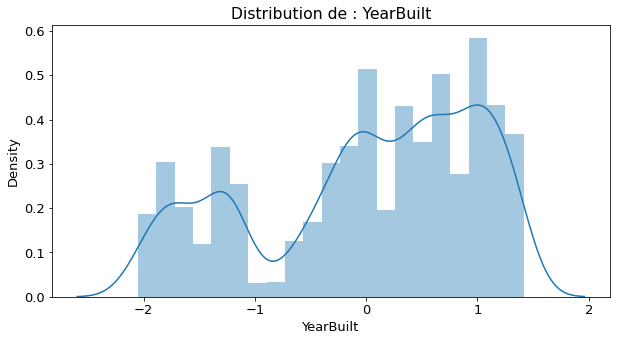

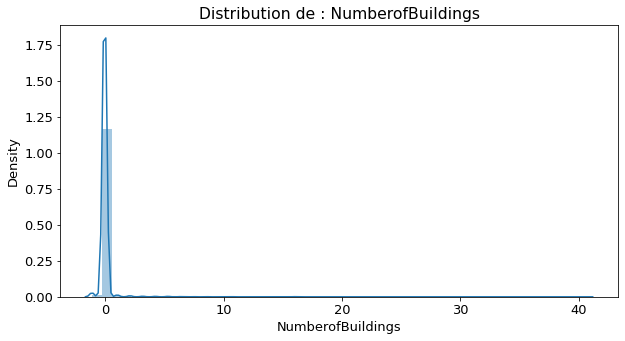

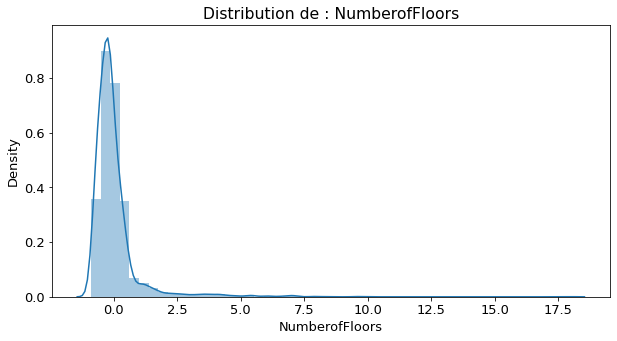

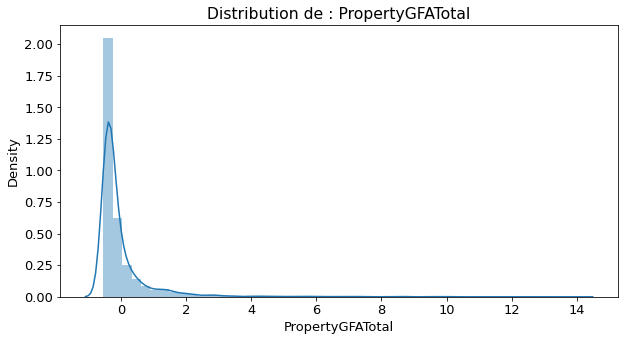

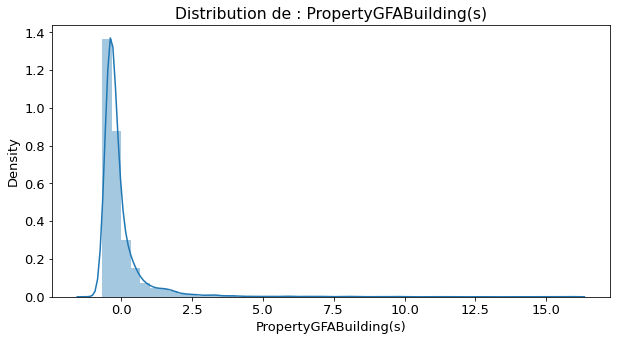

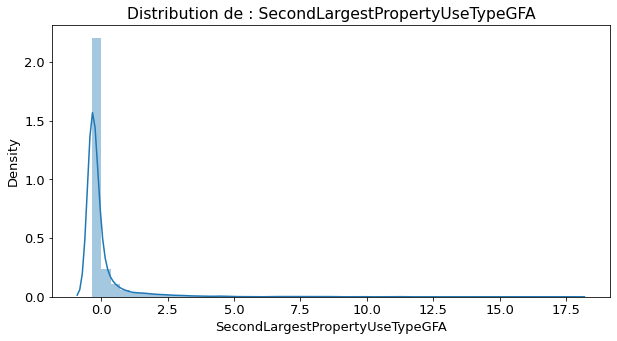

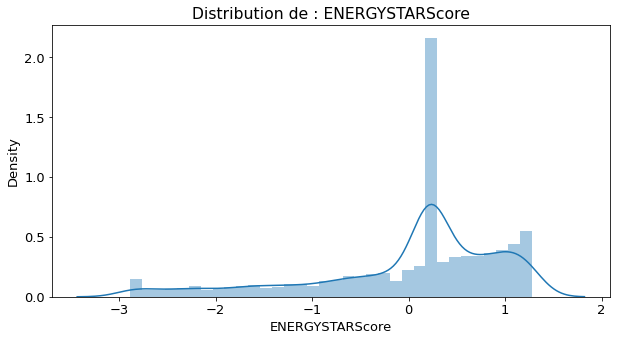

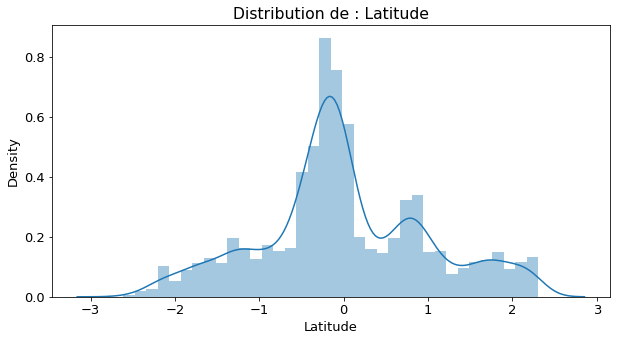

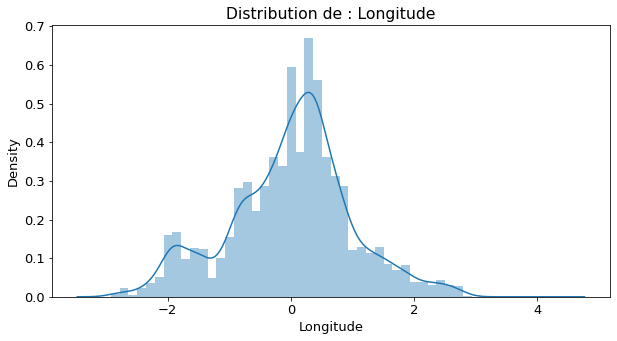

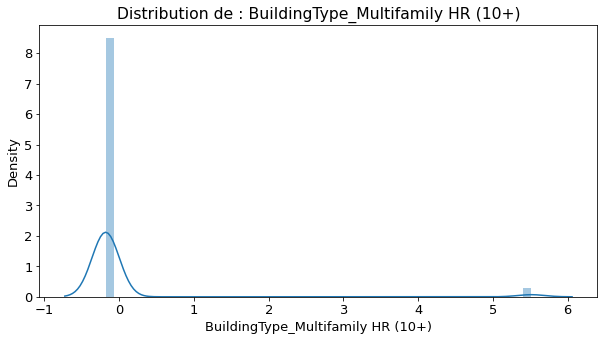

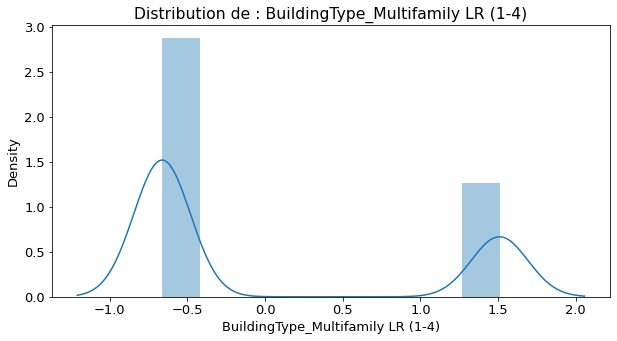

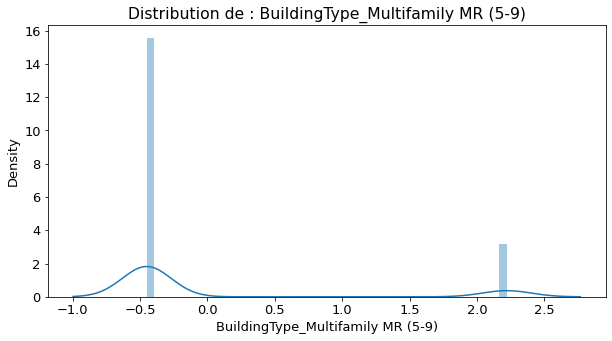

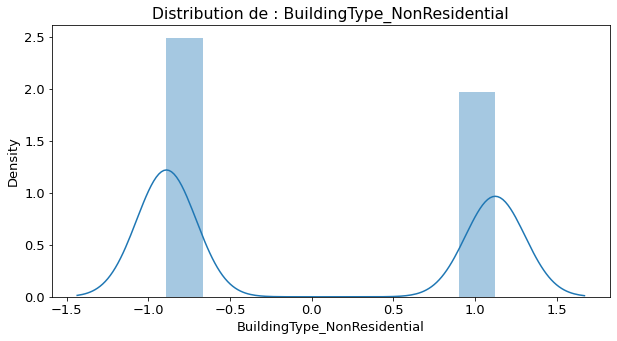

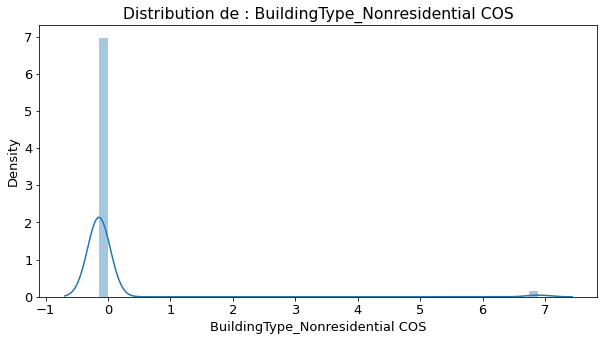

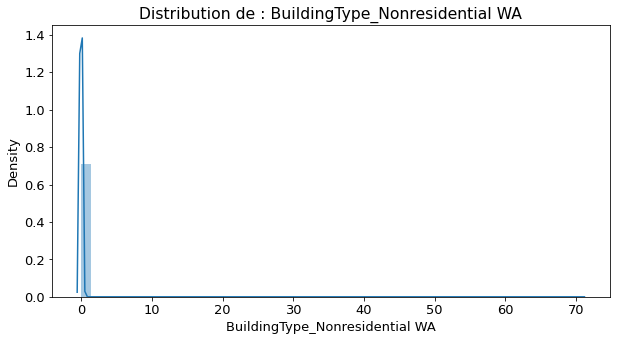

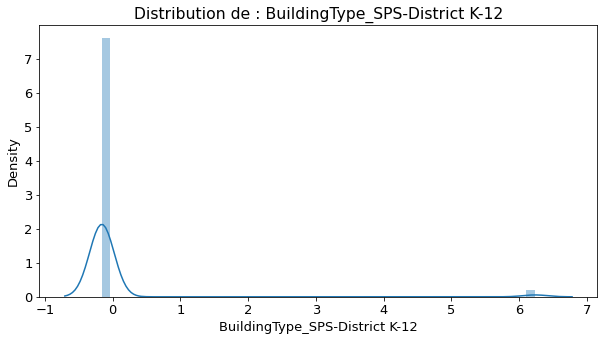

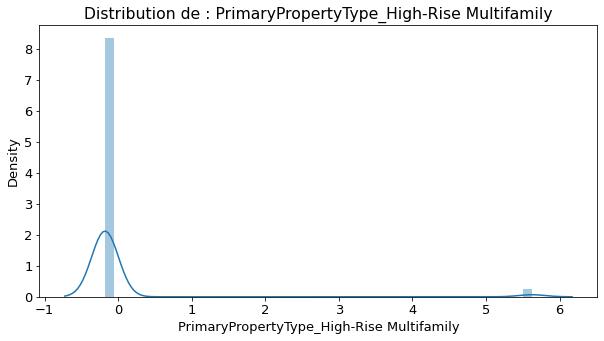

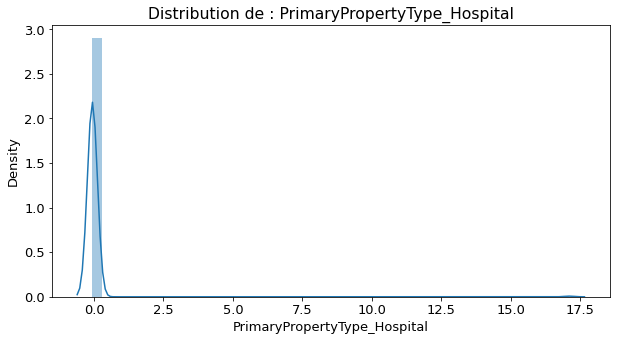

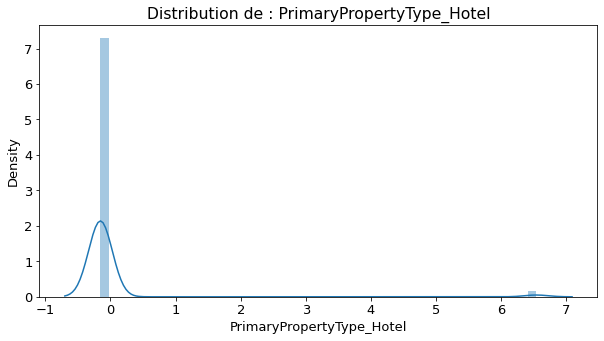

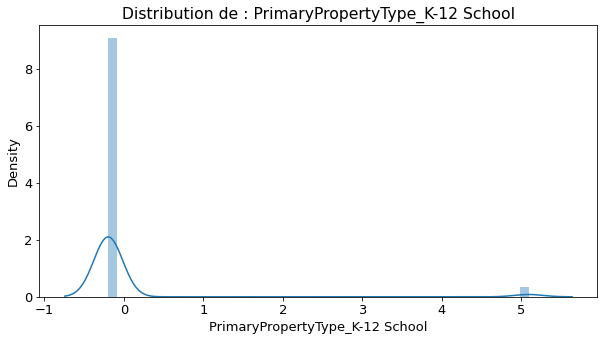

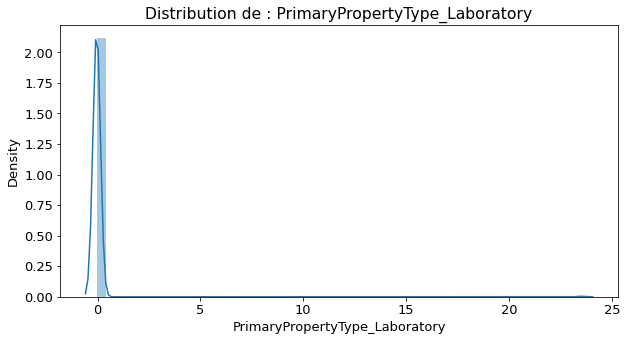

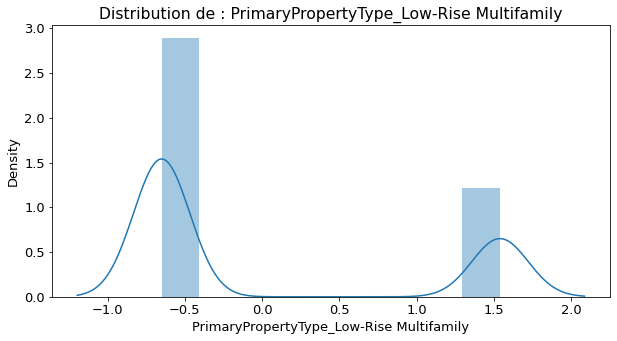

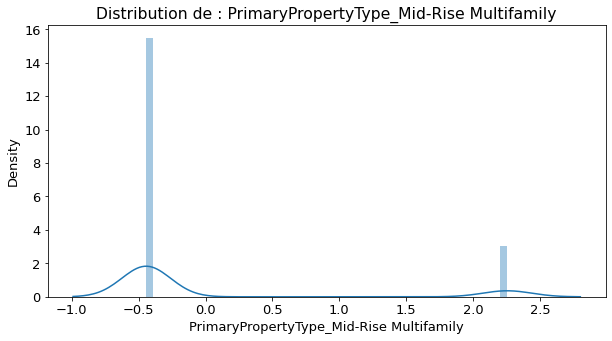

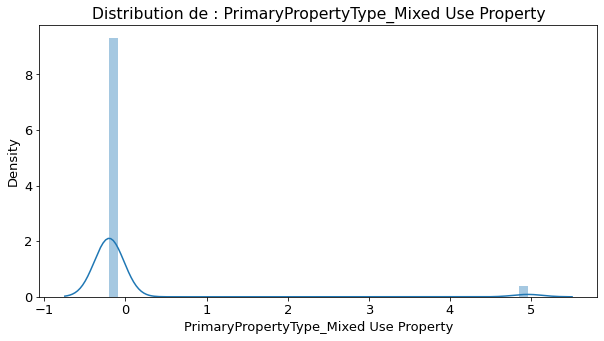

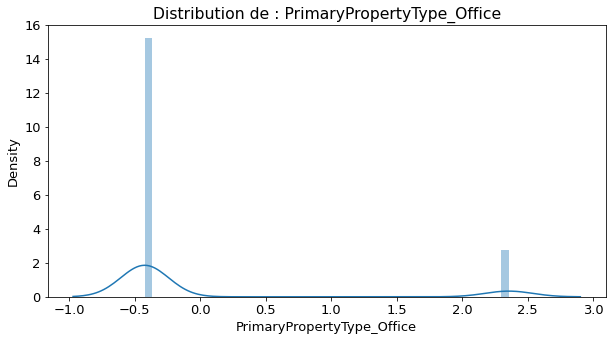

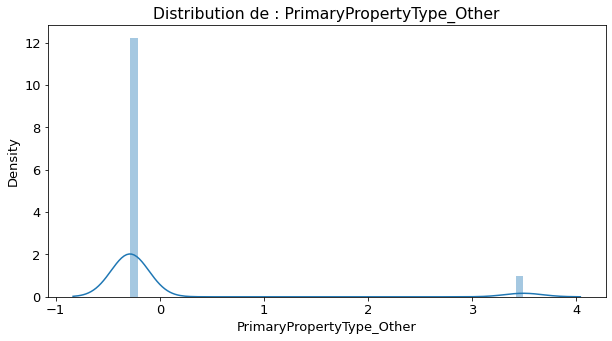

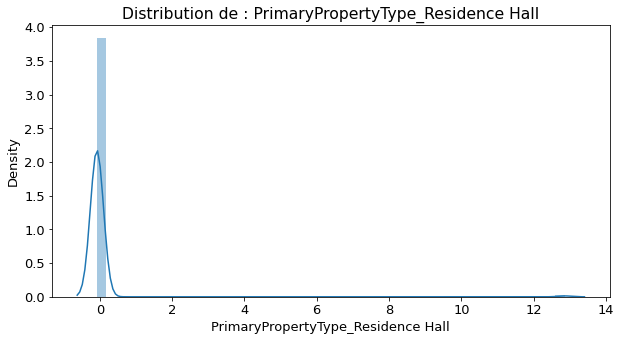

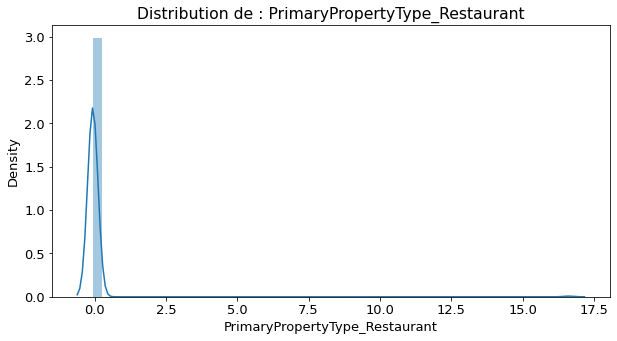

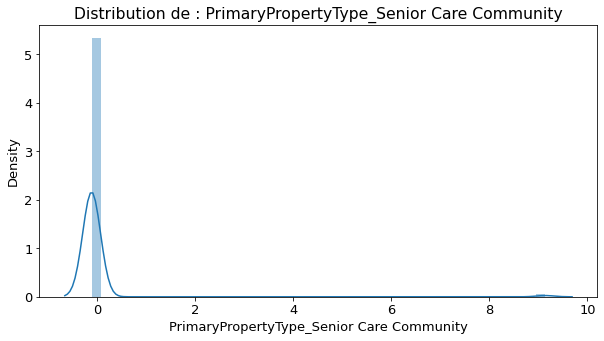

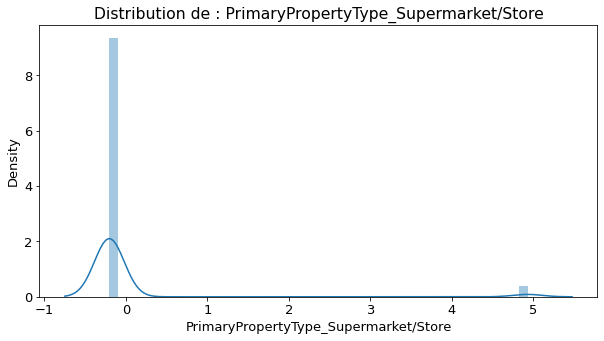

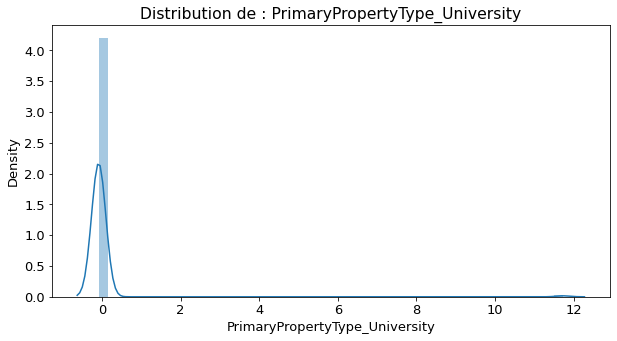

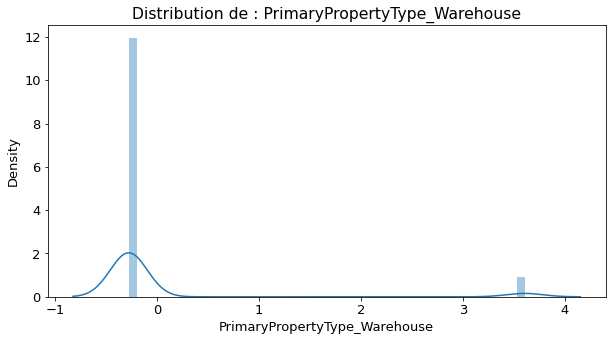

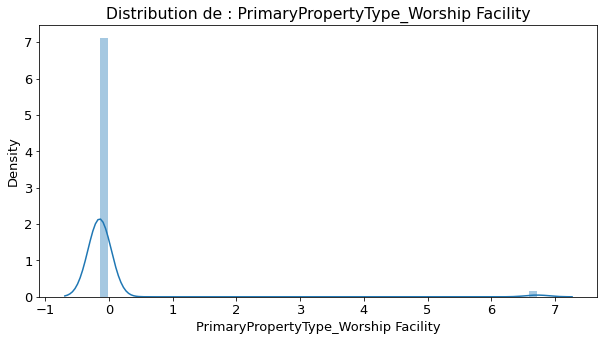

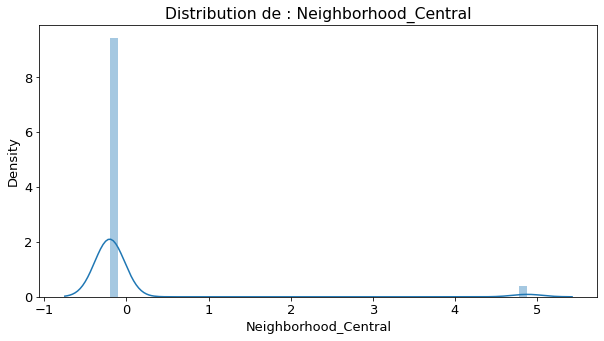

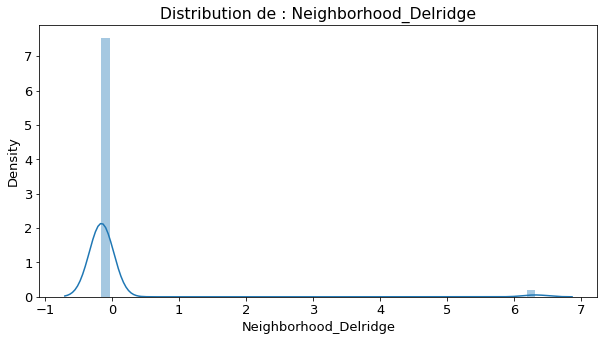

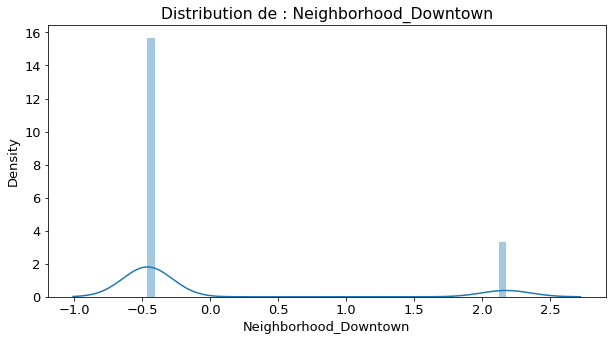

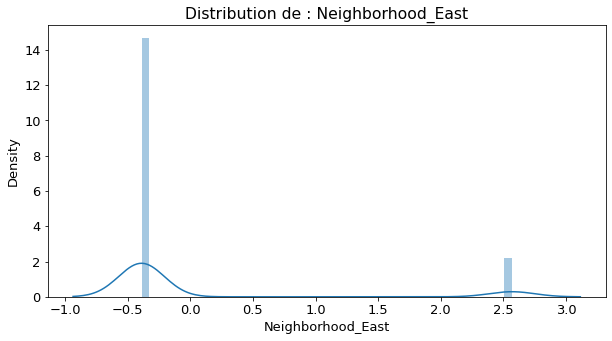

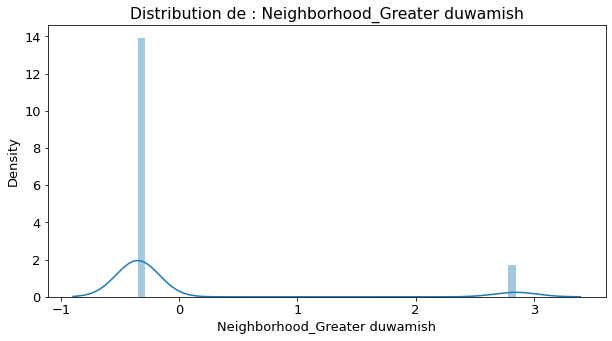

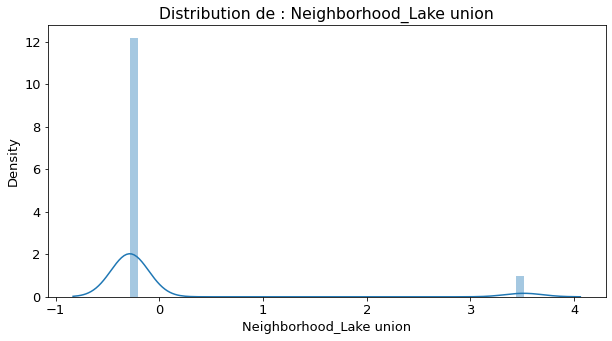

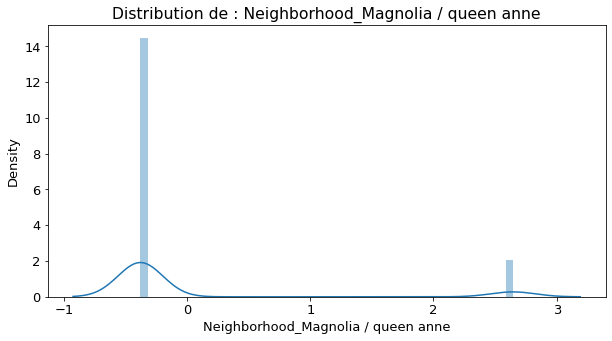

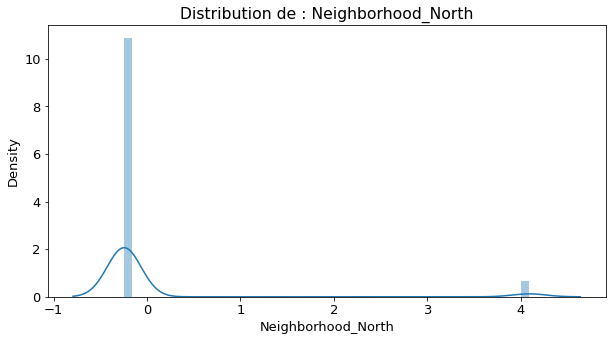

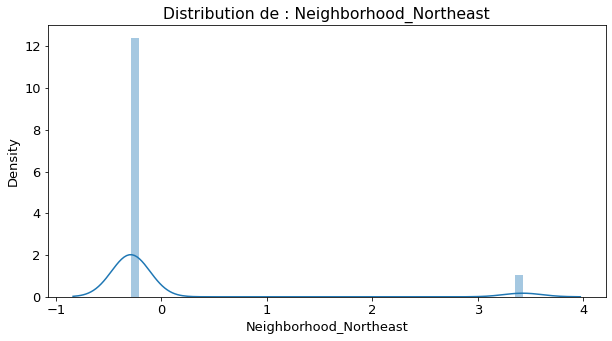

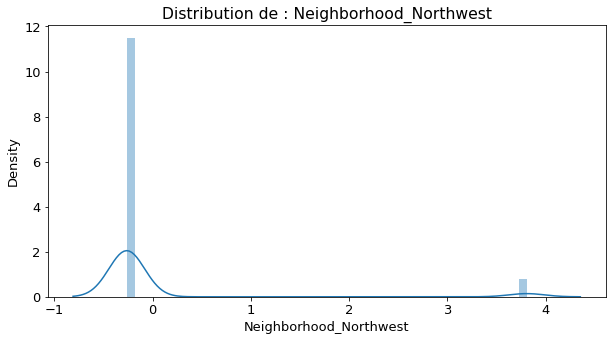

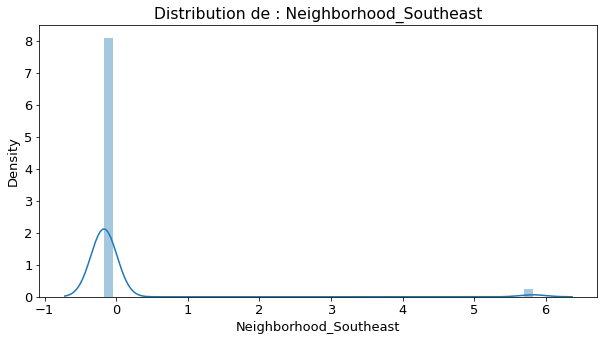

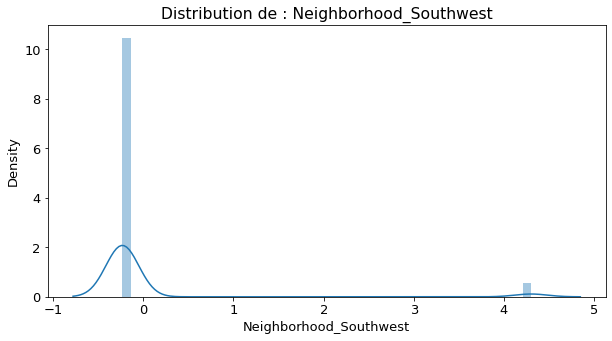

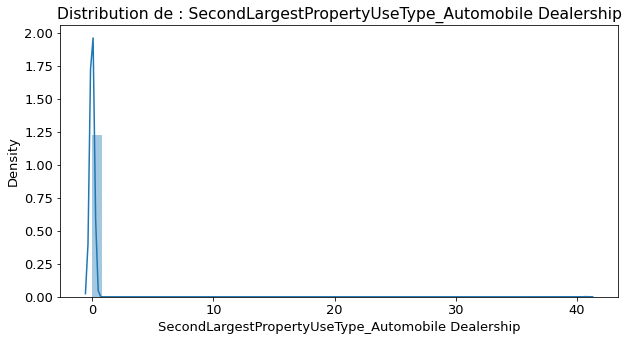

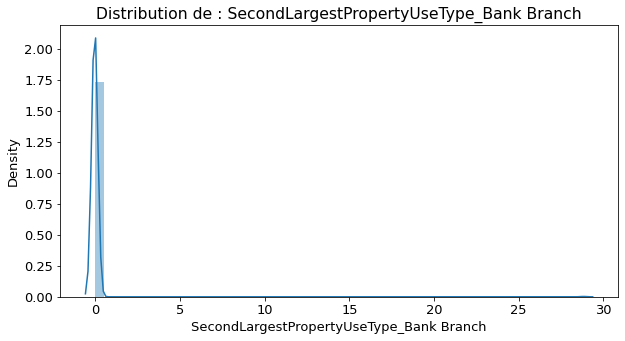

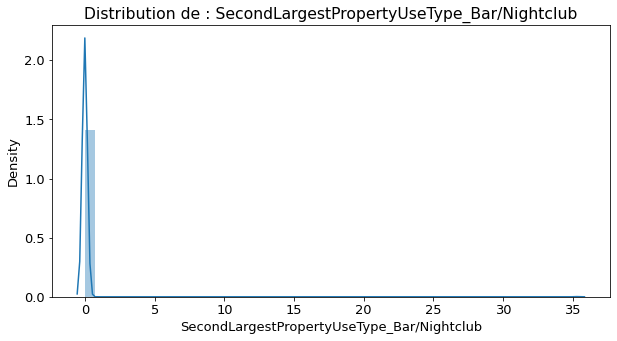

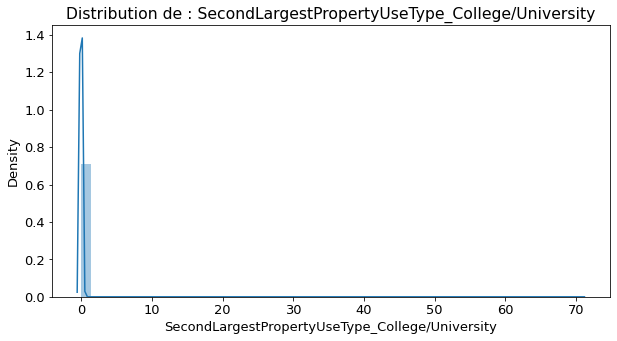

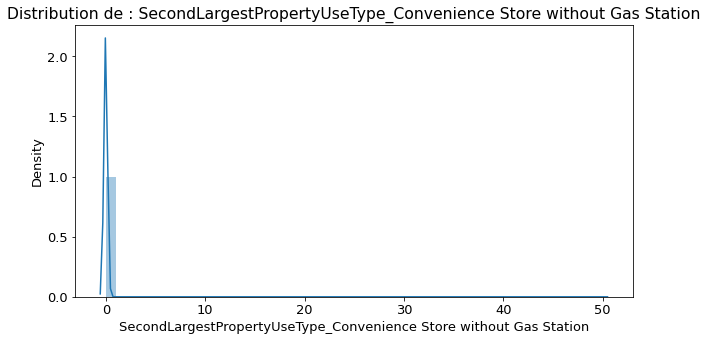

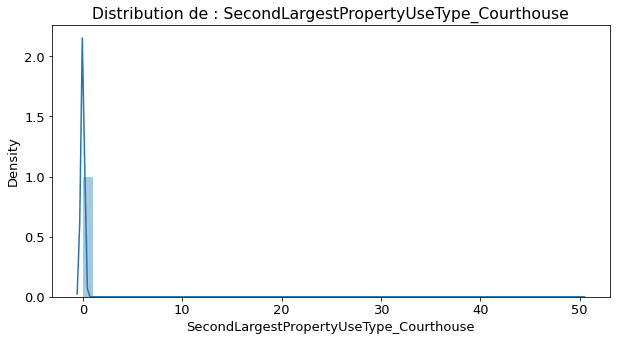

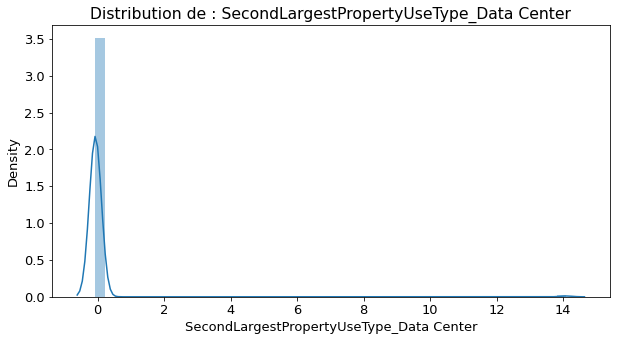

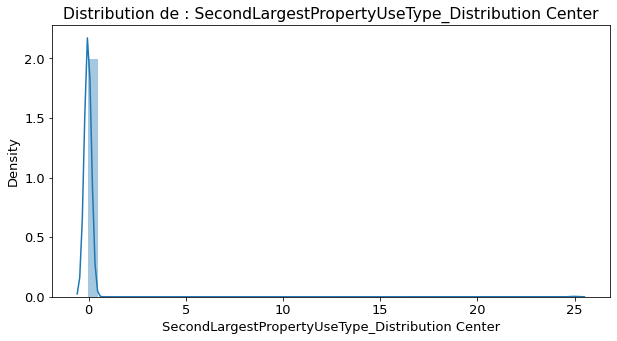

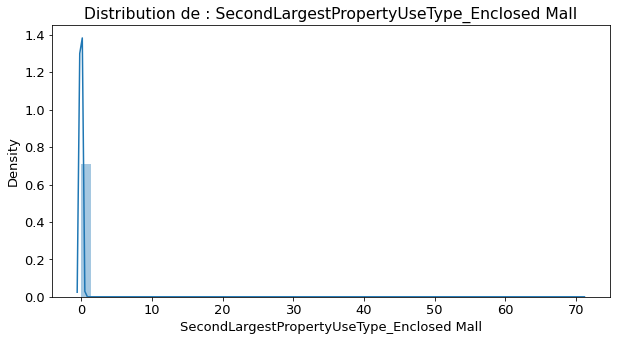

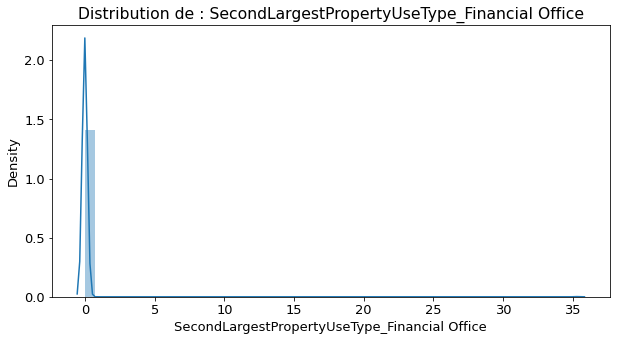

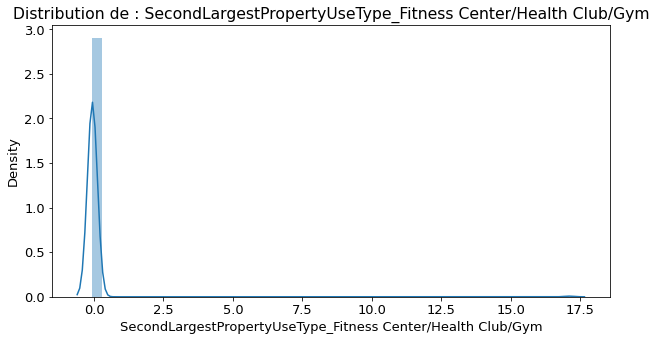

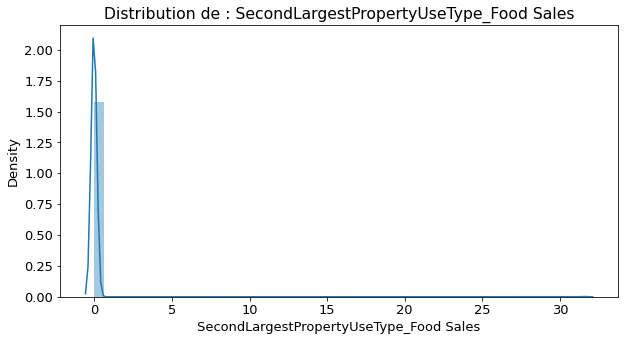

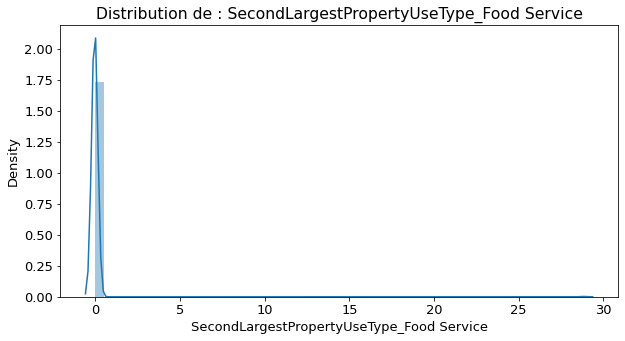

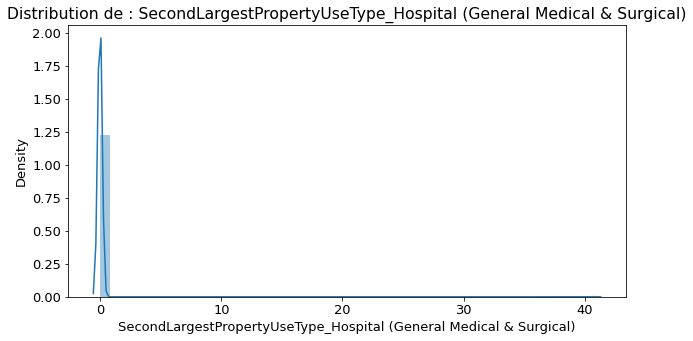

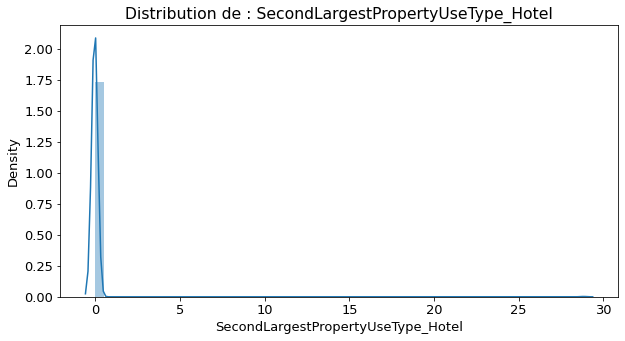

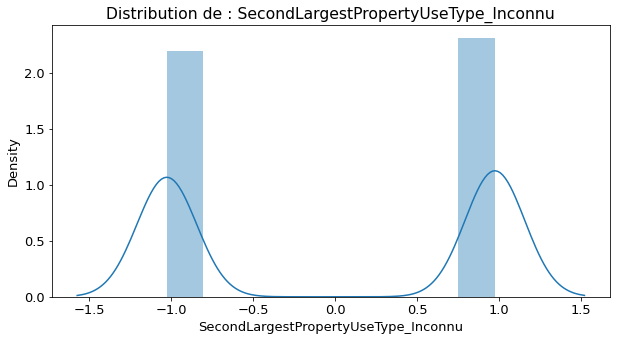

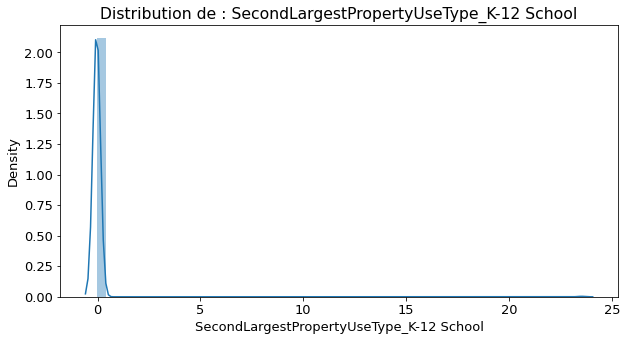

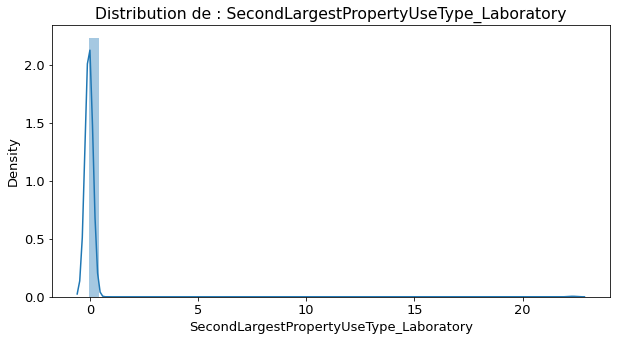

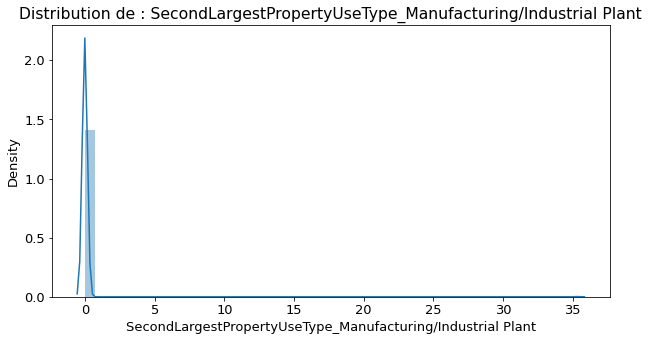

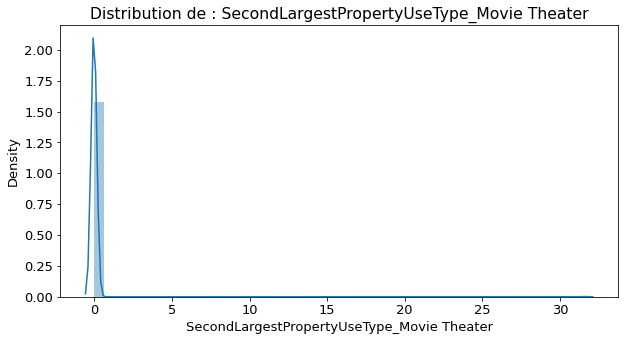

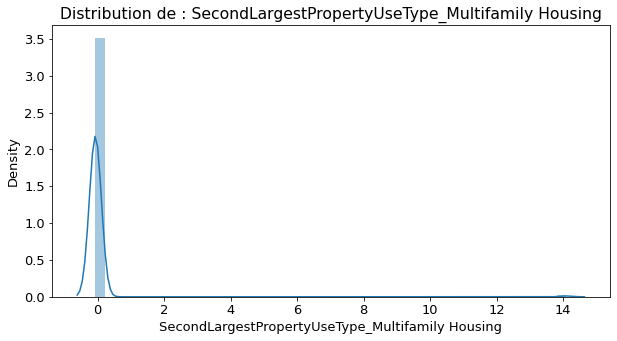

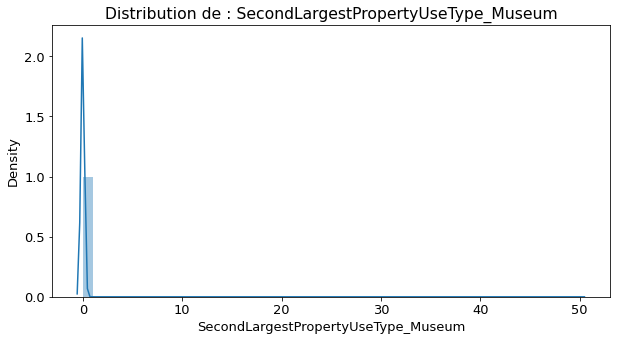

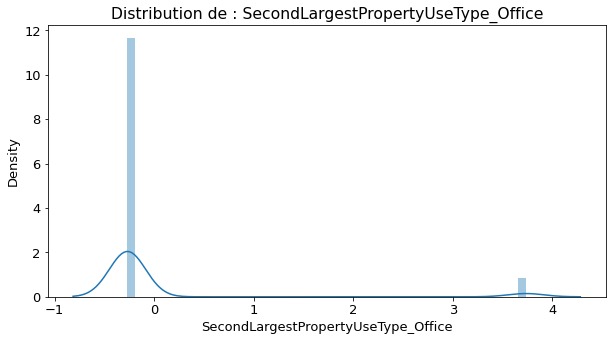

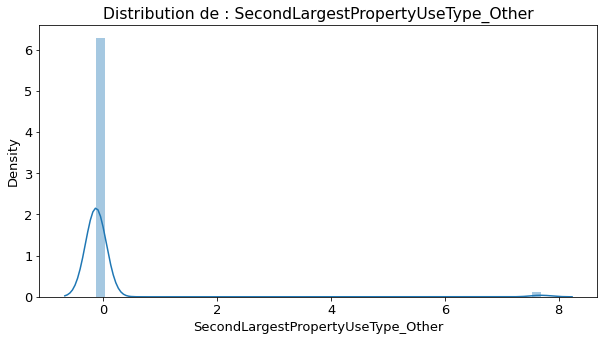

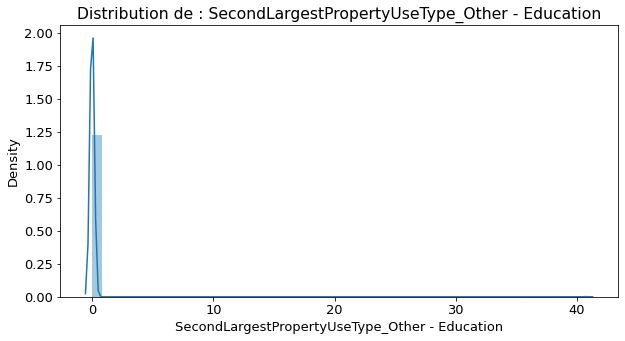

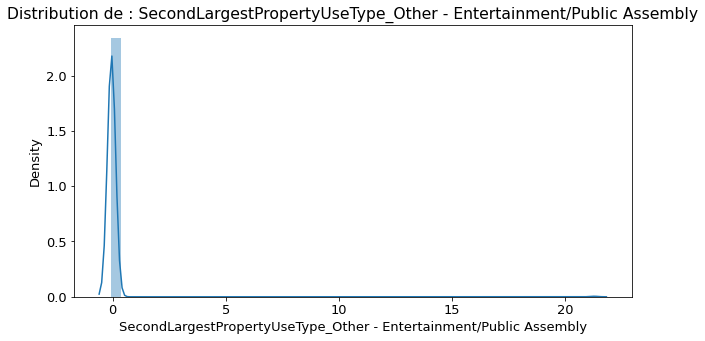

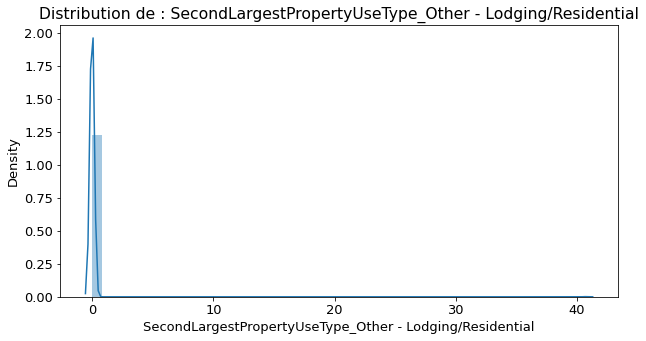

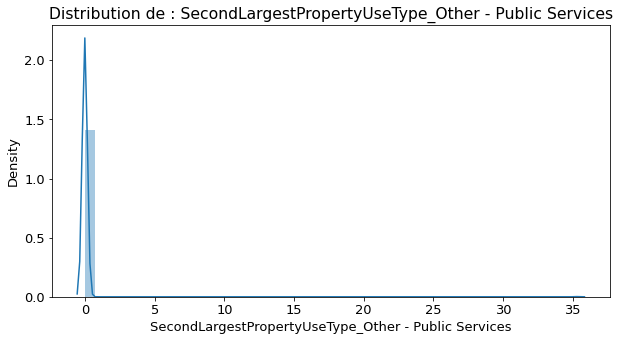

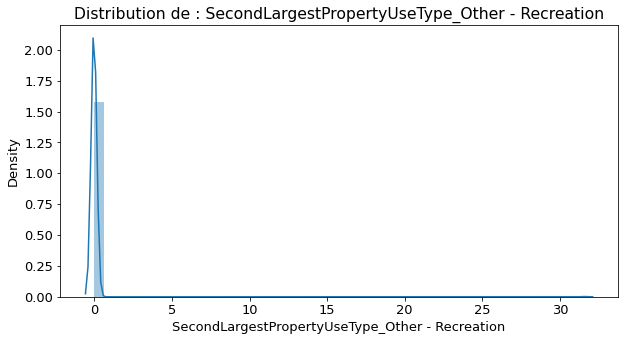

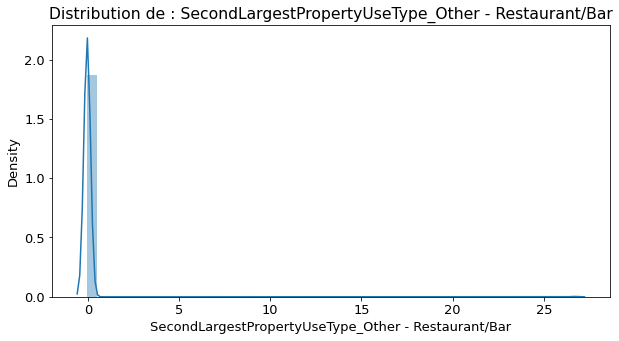

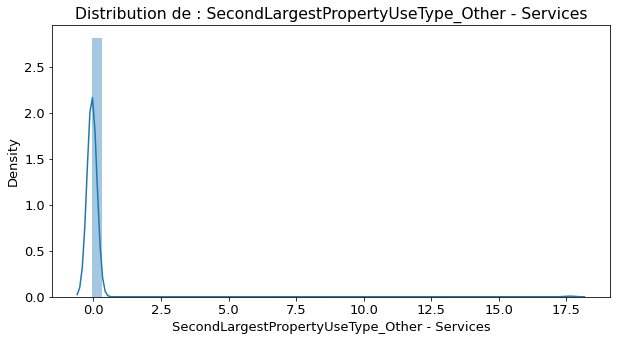

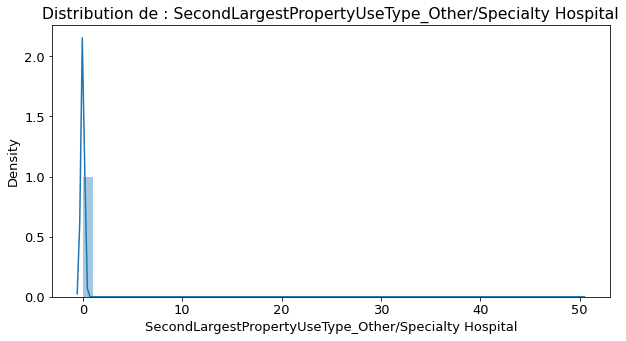

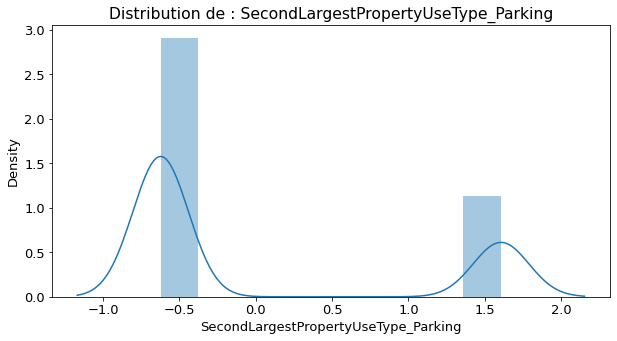

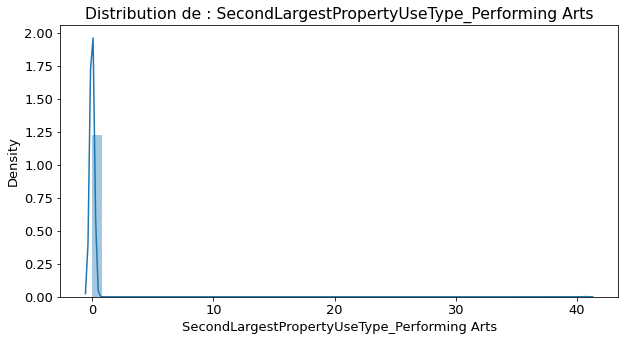

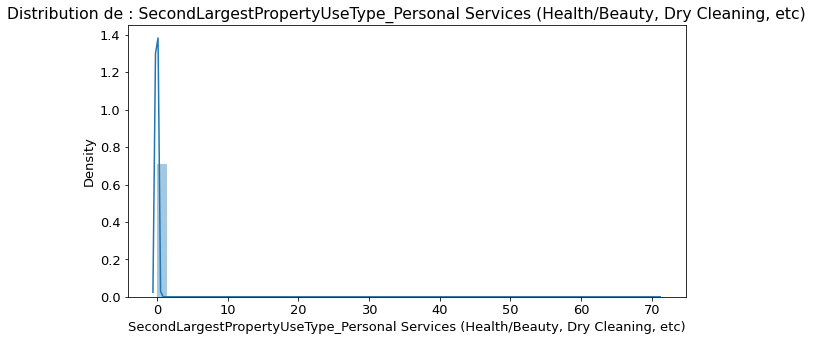

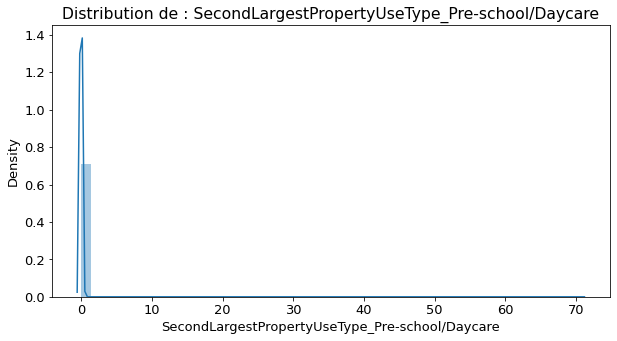

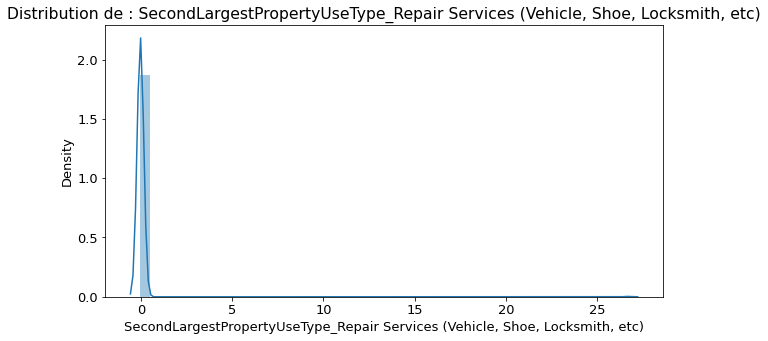

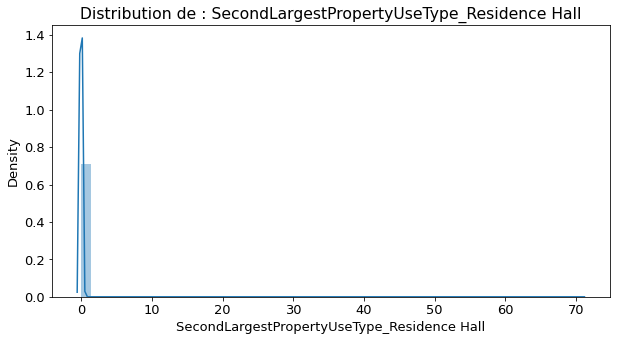

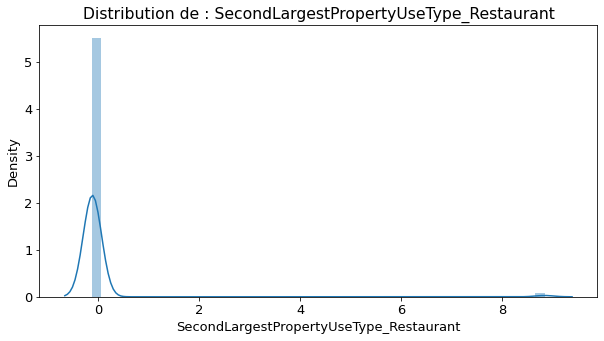

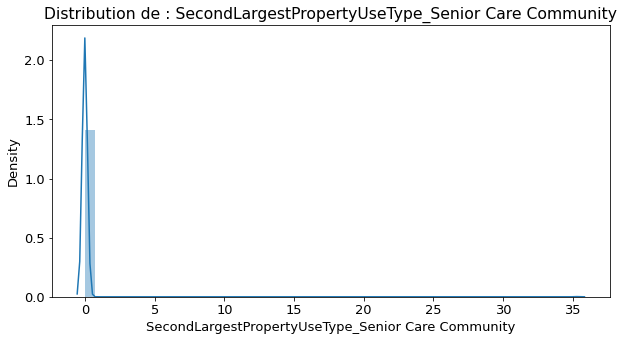

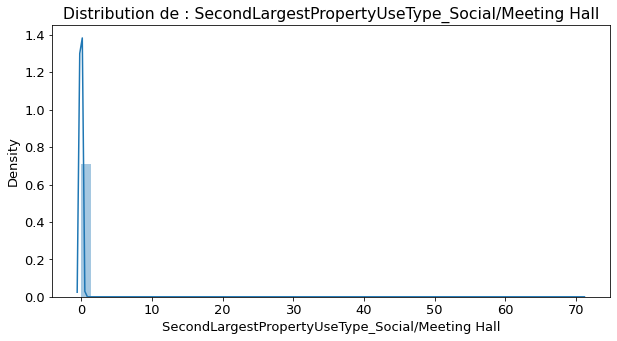

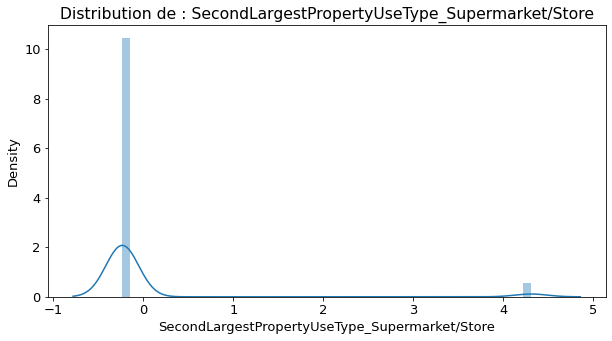

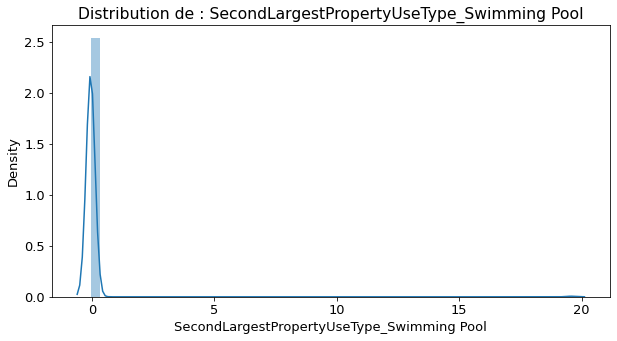

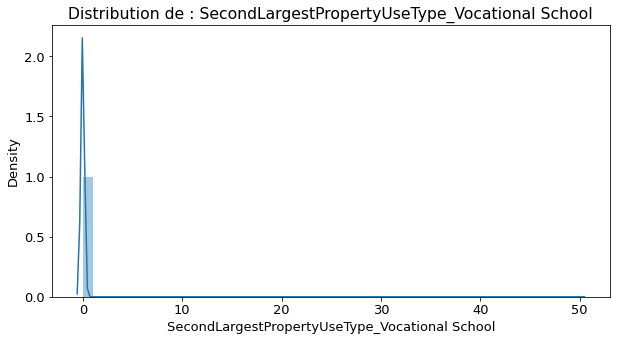

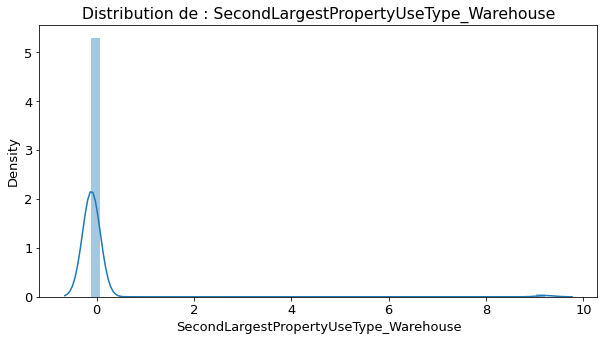

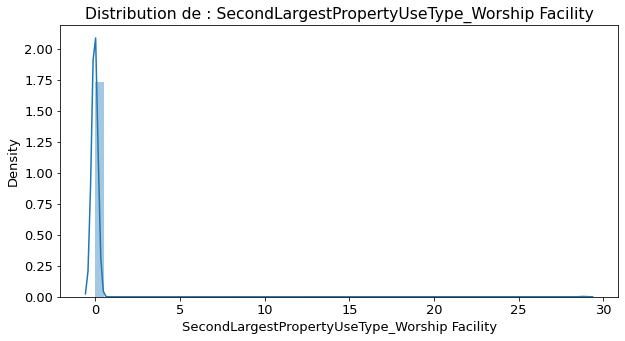

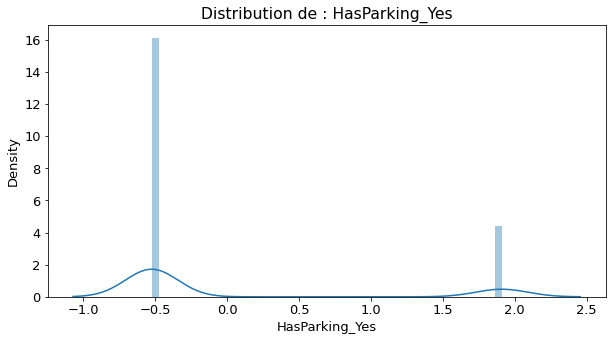

In [20]:
#Aprés normalisation
for col in X1_train:
   # print(col)
    plt.rcParams.update({ "font.size" : 13})
    plt.figure(figsize=(10,5)) 
    sns.distplot(X1_train[col], kde = True)
    plt.title('Distribution de : ' + str(col)) 

## Modélisation

In [21]:
# Essai de plusieurs algorithmes de machine learning
algos_ml1 = {
    "random_forest": {"model": RandomForestRegressor(random_state = seed)},
    "bagging": {"model": BaggingRegressor(random_state = seed)},
    "gbr": {"model": GradientBoostingRegressor(random_state=seed)},
    "ridge": {"model": Ridge(random_state = seed)},
    "xg_boost" : {"model": XGBRegressor(random_state=seed)},
    "svr" : {"model": SVR()},
    "lasso": {"model": Lasso(random_state = seed)},
    "knn" : {"model": KNeighborsRegressor()}
    }

In [22]:
# Appliquer la fonction prédict au jeu de test
for model_name in algos_ml1.keys():
    fitted_model = algos_ml1[model_name]['model'].fit(X1_train, y1_train)
    y1_train_pred = fitted_model.predict(X1_train)
    y1_test_pred = fitted_model.predict(X1_test)
    algos_ml1[model_name]['fitted'] = fitted_model # modèle
    algos_ml1[model_name]['preds'] = y1_test_pred # prédiction sur les données du test
    # la racine carrée de l'erreur moyenne
    algos_ml1[model_name]['RMSE train'] = np.sqrt(mean_squared_error(y1_train, y1_train_pred))
    algos_ml1[model_name]['RMSE test'] = np.sqrt(mean_squared_error(y1_test, y1_test_pred))
    algos_ml1[model_name]['R² train'] = r2_score(y1_train, y1_train_pred)
    algos_ml1[model_name]['R² test'] = r2_score(y1_test, y1_test_pred)

In [23]:
# Afficher le résultat des tests algorithmiques
algos_ml1

{'random_forest': {'model': RandomForestRegressor(random_state=1234),
  'fitted': RandomForestRegressor(random_state=1234),
  'preds': array([14.58607011, 14.17960683, 14.17305569, ..., 14.04907338,
         12.92935815, 15.0003344 ]),
  'RMSE train': 0.14504460687207363,
  'RMSE test': 0.3847497799520185,
  'R² train': 0.9844114660157945,
  'R² test': 0.8741989047016379},
 'bagging': {'model': BaggingRegressor(random_state=1234),
  'fitted': BaggingRegressor(random_state=1234),
  'preds': array([14.52975713, 14.07620514, 14.2160488 , ..., 13.98147111,
         12.68787415, 15.18214089]),
  'RMSE train': 0.17951444390120416,
  'RMSE test': 0.41474714988275985,
  'R² train': 0.9761218377038969,
  'R² test': 0.8538178036930759},
 'gbr': {'model': GradientBoostingRegressor(random_state=1234),
  'fitted': GradientBoostingRegressor(random_state=1234),
  'preds': array([14.57457314, 14.15548844, 14.3701184 , ..., 14.26849448,
         13.94523562, 15.01808318]),
  'RMSE train': 0.46088534013

In [24]:
# Meilleur affichage du résultat
results_metrics = pd.DataFrame.from_dict(algos_ml1, 'index')[['RMSE train', 'RMSE test','R² train', 'R² test']]

with pd.option_context('display.precision', 3):
    best_print = results_metrics.sort_values(by='RMSE test', ascending=True)

best_print  #Min

,RMSE train,RMSE test,R² train,R² test
random_forest,0.145045,0.384750,0.984411,0.874199
xg_boost,0.199357,0.396256,0.970551,0.866562
bagging,0.179514,0.414747,0.976122,0.853818
gbr,0.460885,0.481215,0.842606,0.803209
svr,0.479402,0.518673,0.829705,0.771379
ridge,0.677696,0.675777,0.659693,0.611909
knn,0.553324,0.677880,0.773138,0.609489
lasso,1.161713,1.085686,0.000000,-0.001697


In [25]:
# Modèle de Forêts aléatoires
rf1 = RandomForestRegressor(random_state = seed)
rf1.fit(X1_train,y1_train)

RandomForestRegressor(random_state=1234)

In [26]:
# Selection de features importants
vars_imp1 = pd.Series(rf1.feature_importances_, index = X1_train.columns).sort_values(ascending=False)
vars_imp1

PropertyGFATotal                                         6.455484e-01
ENERGYSTARScore                                          6.301248e-02
PropertyGFABuilding(s)                                   4.746593e-02
YearBuilt                                                3.687403e-02
Latitude                                                 2.599718e-02
                                                             ...     
SecondLargestPropertyUseType_Pre-school/Daycare          9.694386e-07
BuildingType_Nonresidential WA                           6.409796e-07
SecondLargestPropertyUseType_Other/Specialty Hospital    5.476899e-07
SecondLargestPropertyUseType_Financial Office            3.885949e-07
SecondLargestPropertyUseType_College/University          3.510038e-07
Length: 92, dtype: float64

In [27]:
# Variables dont le score(seuil) d'importance est supérieur à 0.005
vars_selected1 = vars_imp1[vars_imp1 > 0.005].index.to_list()
vars_selected1

['PropertyGFATotal',
 'ENERGYSTARScore',
 'PropertyGFABuilding(s)',
 'YearBuilt',
 'Latitude',
 'PrimaryPropertyType_Warehouse',
 'Longitude',
 'BuildingType_NonResidential',
 'SecondLargestPropertyUseTypeGFA',
 'NumberofFloors',
 'PrimaryPropertyType_Supermarket/Store',
 'PrimaryPropertyType_Low-Rise Multifamily',
 'PrimaryPropertyType_Other']

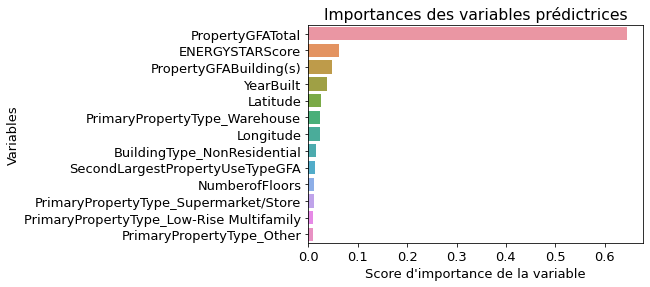

In [28]:
# Visualisation des variables importantes
sns.barplot(x=vars_imp1[vars_imp1 > 0.005], y=vars_selected1)
plt.xlabel("Score d'importance de la variable")
plt.ylabel("Variables")
plt.title("Importances des variables prédictrices")
plt.show()

In [29]:
# Nombbre de variables prédictrices
len(vars_selected1)

13

Finalement 14 variables iront au modélisation

In [30]:
# Modélisation avec les caractéristiques les plus importantes

rf1 = RandomForestRegressor(random_state = seed)

rf1.fit(X1_train[vars_selected1], y1_train)

rmse_test1 = np.sqrt(mean_squared_error(y1_test, rf1.predict(X1_test[vars_selected1])))
rmse_test1

0.3906602882894635

In [31]:
# Réglage des hyperparamètres à tester
import time
start_time = time.time()

RF1 = RandomForestRegressor(random_state=seed)

# Les arguments que nous voulons tester

RF_hyp1 = {'n_estimators':[200, 250, 300, 350, 500],
          'max_features':['auto', 'sqrt'],
          'max_depth':[None, 10, 15, 20, 30]}

# Donnons à GridSearchCV le nombre de folder de validation croisée que nous voulons
# donner un score à optimiser 
RF_cv1 = GridSearchCV(RF1, RF_hyp1, cv = 5, n_jobs = -1, scoring ='neg_mean_squared_error')

# Ensuite lancer l'algorithme sur le jeu d'entrainement
RF_cv1.fit(X1_train, y1_train)

# Afficher le meilleur hyperparamètre
print(RF_cv1.best_score_)

print(RF_cv1.best_estimator_)

print("Temps d'execution de l'agorithme : {:.4} mn.".format((time.time() - start_time)/60))

-0.16583331100219745
RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=500,
                      random_state=1234)
Temps d'execution de l'agorithme : 4.896 mn.


Le modèle a un bon score d'entrainement. Evaluons sa performance sur les données de validation afin d'apprécier sa capacité à généraliser sur de nouvelles données

In [32]:
# Meilleur paramètre
RF_cv1.best_params_

{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 500}

Ensuite je peux évaluer la performance de mon algorithme sur les données d'entrainnemnt et test avec le meilleur hyperparamètre choisit

In [33]:
# Définition d'une fonction pour évaluer l'erreur quadratique des données
def model_evaluation(model, features, labels):
    pred = model.predict(features)
    rmse = np.sqrt(mean_squared_error(labels, pred))
    return rmse

In [34]:
# L'erreur quadratique des données d'entrainement
rmse_train_cv1 = model_evaluation(RF_cv1.best_estimator_, X1_train, y1_train)
rmse_train_cv1

0.14048220580397133

In [35]:
# L'erreur quadratique des données test
rmse_test_cv1 = model_evaluation(RF_cv1.best_estimator_, X1_test, y1_test)
rmse_test_cv1

0.37154448248437244

## Quantité total de CO2 émise

In [36]:
#df = df[df['TotalGHGEmissions']>0].reset_index()

In [37]:
# Features
X2 = df.drop(columns=['SiteEnergyUse(kBtu)','TotalGHGEmissions'], axis = 1)

# Variable cible
y2 = np.log(df['TotalGHGEmissions'])

<AxesSubplot:xlabel='TotalGHGEmissions', ylabel='Density'>

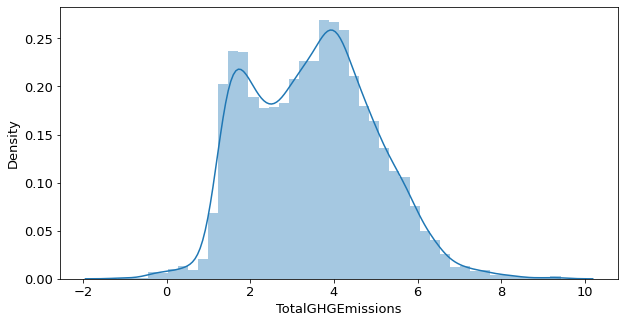

In [38]:
# Visualisation de la variable cible aprés transformation logarithmique
plt.figure(figsize=(10,5)) 
sns.distplot(y2,kde = True)

In [39]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6654 entries, 0 to 6653
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     6654 non-null   object 
 1   PrimaryPropertyType              6654 non-null   object 
 2   Neighborhood                     6654 non-null   object 
 3   YearBuilt                        6654 non-null   int64  
 4   NumberofBuildings                6654 non-null   float64
 5   NumberofFloors                   6654 non-null   float64
 6   PropertyGFATotal                 6654 non-null   int64  
 7   PropertyGFABuilding(s)           6654 non-null   int64  
 8   SecondLargestPropertyUseType     6654 non-null   object 
 9   SecondLargestPropertyUseTypeGFA  6654 non-null   float64
 10  ENERGYSTARScore                  6654 non-null   float64
 11  Latitude                         6654 non-null   float64
 12  Longitude           

In [40]:
# Encodage des variables catégorielles
cat_vars2 = X2.select_dtypes(include=["object"]).columns.to_list()
cat_vars2

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'SecondLargestPropertyUseType',
 'HasParking']

In [41]:
# Encodage des variables catégorielles
X2_OHE = pd.get_dummies(data = X2, columns = cat_vars2, drop_first= True)
X2_OHE.head(5)

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,Latitude,Longitude,BuildingType_Multifamily HR (10+),...,SecondLargestPropertyUseType_Residence Hall,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Senior Care Community,SecondLargestPropertyUseType_Social/Meeting Hall,SecondLargestPropertyUseType_Supermarket/Store,SecondLargestPropertyUseType_Swimming Pool,SecondLargestPropertyUseType_Vocational School,SecondLargestPropertyUseType_Warehouse,SecondLargestPropertyUseType_Worship Facility,HasParking_Yes
0,1927,1.0,12.0,88434,88434,0.0,65.0,47.612190,-122.337997,0,...,0,0,0,0,0,0,0,0,0,0
1,1996,1.0,11.0,103566,88502,15064.0,51.0,47.613106,-122.333358,0,...,0,0,0,0,0,0,0,0,0,1
2,1969,1.0,41.0,961990,961990,100000.0,18.0,47.613349,-122.337699,0,...,0,0,0,0,0,0,0,0,0,0
3,1926,1.0,10.0,61320,61320,0.0,1.0,47.614216,-122.336609,0,...,0,0,0,0,0,0,0,0,0,0
4,1980,1.0,18.0,119890,107430,68009.0,67.0,47.613754,-122.340924,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
# Données d'entrainement et de test
seed  = 1234 # controler l'aléatoire
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_OHE, y2, test_size = 0.25, random_state= seed)
print("X2_train shape:", X2_train.shape)
print("X2_test shape:", X2_test.shape)
print("y2_train shape:", y2_train.shape)
print("y2_test shape:", y2_test.shape)

X2_train shape: (4990, 92)
X2_test shape: (1664, 92)
y2_train shape: (4990,)
y2_test shape: (1664,)


In [43]:
# Standardisation
scaler = StandardScaler()
scaler.fit(X2_train)
X2_train = pd.DataFrame(scaler.transform(X2_train), columns = X2_OHE.columns)
X2_test = pd.DataFrame(scaler.transform(X2_test), columns = X2_test.columns)

### Modélisation

In [44]:
# Essai de plusieurs algorithmes de machine learning
algos_ml2 = {
    "random_forest": {"model": RandomForestRegressor(random_state = seed)},
    "bagging": {"model": BaggingRegressor(random_state = seed)},
    "gbr": {"model": GradientBoostingRegressor(random_state=seed)},
    "ridge": {"model": Ridge(random_state = seed)},
    "xg_boost" : {"model": XGBRegressor(random_state=seed)},
    "svr" : {"model": SVR()},
    "lasso": {"model": Lasso(random_state = seed)},
    "knn" : {"model": KNeighborsRegressor()}
    }

In [45]:
# Appliquer la fonction prédict au jeu de test
for model_name in algos_ml2.keys():
    
    fitted_model = algos_ml2[model_name]['model'].fit(X2_train, y2_train) # modele entrainer
    y2_train_pred = fitted_model.predict(X2_train)
    y2_test_pred = fitted_model.predict(X2_test)
    algos_ml2[model_name]['fitted'] = fitted_model
    algos_ml2[model_name]['preds'] = y1_test_pred
    algos_ml2[model_name]['RMSE train'] = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
    algos_ml2[model_name]['RMSE test'] = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
    algos_ml2[model_name]['R² train'] = r2_score(y2_train, y2_train_pred)
    algos_ml2[model_name]['R² test'] = r2_score(y2_test, y2_test_pred)

In [46]:
# Afficher les résultats des tests
algos_ml2

{'random_forest': {'model': RandomForestRegressor(random_state=1234),
  'fitted': RandomForestRegressor(random_state=1234),
  'preds': array([14.27584796, 13.68525158, 14.45548892, ..., 13.86921304,
         14.22282268, 14.47687854]),
  'RMSE train': 0.24713419606206494,
  'RMSE test': 0.6763648479103946,
  'R² train': 0.9731790610420824,
  'R² test': 0.778044315345416},
 'bagging': {'model': BaggingRegressor(random_state=1234),
  'fitted': BaggingRegressor(random_state=1234),
  'preds': array([14.27584796, 13.68525158, 14.45548892, ..., 13.86921304,
         14.22282268, 14.47687854]),
  'RMSE train': 0.30943110135843893,
  'RMSE test': 0.714424644401223,
  'R² train': 0.9579528835353975,
  'R² test': 0.7523621239358333},
 'gbr': {'model': GradientBoostingRegressor(random_state=1234),
  'fitted': GradientBoostingRegressor(random_state=1234),
  'preds': array([14.27584796, 13.68525158, 14.45548892, ..., 13.86921304,
         14.22282268, 14.47687854]),
  'RMSE train': 0.82328100245463

In [47]:
# Meilleur affichage du résultat
results_metrics = pd.DataFrame.from_dict(algos_ml2, "index")[['RMSE train', 'RMSE test','R² train', 'R² test']]

with pd.option_context('display.precision', 3):
    best_print = results_metrics.sort_values(by='RMSE test', ascending=True)

best_print

,RMSE train,RMSE test,R² train,R² test
random_forest,0.247134,0.676365,0.973179,0.778044
xg_boost,0.387563,0.709894,0.934038,0.755493
bagging,0.309431,0.714425,0.957953,0.752362
gbr,0.823281,0.874876,0.702351,0.628638
svr,0.868108,0.948025,0.669055,0.563943
knn,0.821904,1.030428,0.703346,0.484843
ridge,1.058937,1.076206,0.507566,0.438053
lasso,1.509023,1.435873,0.000000,-0.000314


In [48]:
# Modèle de Forêts aléatoires
rf2 = RandomForestRegressor(random_state = seed)

rf2.fit(X2_train, y2_train)

RandomForestRegressor(random_state=1234)

In [49]:
vars_imp2 = pd.Series(rf2.feature_importances_, index = X2_train.columns).sort_values(ascending=False)
vars_imp2

PropertyGFATotal                                                                     2.510300e-01
PropertyGFABuilding(s)                                                               2.345046e-01
YearBuilt                                                                            1.113305e-01
ENERGYSTARScore                                                                      6.431821e-02
PrimaryPropertyType_Low-Rise Multifamily                                             6.397652e-02
                                                                                         ...     
SecondLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)    2.764816e-06
SecondLargestPropertyUseType_Social/Meeting Hall                                     2.520071e-06
SecondLargestPropertyUseType_Other/Specialty Hospital                                1.651806e-06
SecondLargestPropertyUseType_Enclosed Mall                                           1.301614e-06
SecondLargestPropert

In [50]:
# variables dont le score d'importance est supérieur à 0,005 
vars_selected2 = vars_imp2[vars_imp2 > 0.005].index.to_list() 
vars_selected2

['PropertyGFATotal',
 'PropertyGFABuilding(s)',
 'YearBuilt',
 'ENERGYSTARScore',
 'PrimaryPropertyType_Low-Rise Multifamily',
 'Latitude',
 'Longitude',
 'SecondLargestPropertyUseTypeGFA',
 'NumberofFloors',
 'PrimaryPropertyType_Warehouse',
 'PrimaryPropertyType_Other',
 'PrimaryPropertyType_Hospital',
 'PrimaryPropertyType_Office',
 'PrimaryPropertyType_Mid-Rise Multifamily',
 'BuildingType_NonResidential',
 'PrimaryPropertyType_Hotel',
 'PrimaryPropertyType_Supermarket/Store']

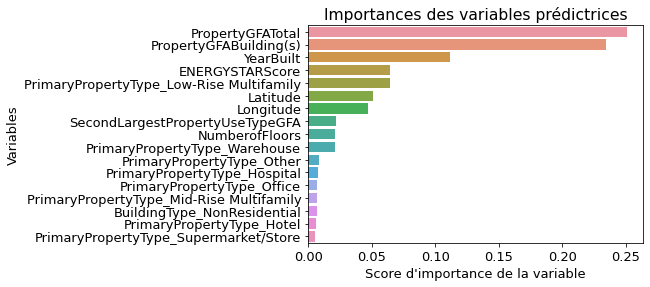

In [51]:
# Représentation graphique
sns.barplot(x=vars_imp2[vars_imp2 > 0.005], y=vars_selected2)
plt.xlabel("Score d'importance de la variable")
plt.ylabel("Variables")
plt.title("Importances des variables prédictrices")
plt.show()

In [52]:
# Modélisation avec les caractéristiques les plus importantes

rf2 = RandomForestRegressor(random_state = seed)

rf2.fit(X2_train[vars_selected2], y2_train)
 

rmse_test2 = np.sqrt(mean_squared_error(y2_test, rf2.predict(X2_test[vars_selected2])))
rmse_test2

0.6780914587291955

In [53]:
# Réglage des hyperparamètres à tester
import time
start_time = time.time()

RF2 = RandomForestRegressor(random_state=seed)

RF_hyp2 = {'n_estimators':[50, 100, 200, 300, 500],
          'max_features':['auto', 'sqrt'],
          'max_depth':[None, 5, 10, 15, 20]}

RF_cv2 = GridSearchCV(RF2, RF_hyp2, cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')

RF_cv2.fit(X2_train, y2_train)

print(RF_cv2.best_score_)

print(RF_cv2.best_estimator_)

print("Temps d'execution de l'agorithme : {:.4} mn.".format((time.time() - start_time)/60))

-0.4896879138263938
RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=1234)
Temps d'execution de l'agorithme : 2.864 mn.


In [54]:
# Meilleurs paramètres
RF_cv2.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}

In [1]:
# Définition d'une fonction pour évaluer l'erreur quadratique des données
def model_evaluation(model, features, labels):
    pred = model.predict(features)
    rmse = np.sqrt(mean_squared_error(labels, pred))
    return rmse

In [56]:
# L'erreur quadratique des données d'entrainement
rmse_train_cv2 = model_evaluation(RF_cv2.best_estimator_, X2_train, y2_train)
rmse_train_cv2

0.23836505642990144

In [57]:
# L'erreur quadratique des données test
rmse_test_cv2 = model_evaluation(RF_cv2.best_estimator_, X2_test, y2_test)
rmse_test_cv2

0.6567923138231266

## Faire la prédiction sans " ENERGYSTARScore "

In [58]:
# Features
X3 = df.drop(columns=['SiteEnergyUse(kBtu)','TotalGHGEmissions',"ENERGYSTARScore"], axis = 1)

# Variable cible
#y = df['SiteEnergyUse(kBtu)']
y3 = np.log(df['SiteEnergyUse(kBtu)']) # J'ai d'abord faire ça le logarithme et les résultats n'étaient pas satisfaisants.

In [59]:
# La structure des données
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6654 entries, 0 to 6653
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     6654 non-null   object 
 1   PrimaryPropertyType              6654 non-null   object 
 2   Neighborhood                     6654 non-null   object 
 3   YearBuilt                        6654 non-null   int64  
 4   NumberofBuildings                6654 non-null   float64
 5   NumberofFloors                   6654 non-null   float64
 6   PropertyGFATotal                 6654 non-null   int64  
 7   PropertyGFABuilding(s)           6654 non-null   int64  
 8   SecondLargestPropertyUseType     6654 non-null   object 
 9   SecondLargestPropertyUseTypeGFA  6654 non-null   float64
 10  Latitude                         6654 non-null   float64
 11  Longitude                        6654 non-null   float64
 12  HasParking          

In [60]:
# Encodage des variables catégorielles
cat_vars3 = X3.select_dtypes(include=["object"]).columns.to_list()
cat_vars3

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'SecondLargestPropertyUseType',
 'HasParking']

In [61]:
# Encodage des variables catégorielles
X3_OHE = pd.get_dummies(data = X3, columns = cat_vars3, drop_first= True)
X3_OHE.head(5)

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,Latitude,Longitude,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),...,SecondLargestPropertyUseType_Residence Hall,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Senior Care Community,SecondLargestPropertyUseType_Social/Meeting Hall,SecondLargestPropertyUseType_Supermarket/Store,SecondLargestPropertyUseType_Swimming Pool,SecondLargestPropertyUseType_Vocational School,SecondLargestPropertyUseType_Warehouse,SecondLargestPropertyUseType_Worship Facility,HasParking_Yes
0,1927,1.0,12.0,88434,88434,0.0,47.612190,-122.337997,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1996,1.0,11.0,103566,88502,15064.0,47.613106,-122.333358,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1969,1.0,41.0,961990,961990,100000.0,47.613349,-122.337699,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1926,1.0,10.0,61320,61320,0.0,47.614216,-122.336609,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1980,1.0,18.0,119890,107430,68009.0,47.613754,-122.340924,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
# Données d'entrainement et de test
seed  = 1234
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_OHE, y3, test_size = 0.25, random_state= seed)
print("X3_train shape:", X3_train.shape)
print("X3_test shape:", X3_test.shape)
print("y3_train shape:", y3_train.shape)
print("y3_test shape:", y3_test.shape)

X3_train shape: (4990, 91)
X3_test shape: (1664, 91)
y3_train shape: (4990,)
y3_test shape: (1664,)


In [63]:
# Standardisation
scaler = StandardScaler()
scaler.fit(X3_train)
X3_train = pd.DataFrame(scaler.transform(X3_train), columns = X3_OHE.columns)
X3_test = pd.DataFrame(scaler.transform(X3_test), columns = X3_test.columns)

### Modélisation

In [64]:
# Essai de plusieurs algorithmes de machine learning
algos_ml3 = {
    "random_forest": {"model": RandomForestRegressor(random_state = seed)},
    "bagging": {"model": BaggingRegressor(random_state = seed)},
    "gbr": {"model": GradientBoostingRegressor(random_state=seed)},
    "ridge": {"model": Ridge(random_state = seed)},
    "xg_boost" : {"model": XGBRegressor(random_state=seed)},
    "svr" : {"model": SVR()},
    "lasso": {"model": Lasso(random_state = seed)},
    "knn" : {"model": KNeighborsRegressor()}
    }

In [65]:
# Appliquer la fonction prédict au jeu de test
for model_name in algos_ml3.keys():
    fitted_model = algos_ml3[model_name]['model'].fit(X3_train, y3_train)
    y3_train_pred = fitted_model.predict(X3_train)
    y3_test_pred = fitted_model.predict(X3_test)
    algos_ml3[model_name]['fitted'] = fitted_model
    algos_ml3[model_name]['preds'] = y1_test_pred
    algos_ml3[model_name]['RMSE train'] = np.sqrt(mean_squared_error(y3_train, y3_train_pred))
    algos_ml3[model_name]['RMSE test'] = np.sqrt(mean_squared_error(y3_test, y3_test_pred))
    algos_ml3[model_name]['R² train'] = r2_score(y3_train, y3_train_pred)
    algos_ml3[model_name]['R² test'] = r2_score(y3_test, y3_test_pred)

In [66]:
# Afficher les résultats des tests
algos_ml3

{'random_forest': {'model': RandomForestRegressor(random_state=1234),
  'fitted': RandomForestRegressor(random_state=1234),
  'preds': array([14.27584796, 13.68525158, 14.45548892, ..., 13.86921304,
         14.22282268, 14.47687854]),
  'RMSE train': 0.15486123749354938,
  'RMSE test': 0.40551588495398433,
  'R² train': 0.9822299948226193,
  'R² test': 0.860252706884149},
 'bagging': {'model': BaggingRegressor(random_state=1234),
  'fitted': BaggingRegressor(random_state=1234),
  'preds': array([14.27584796, 13.68525158, 14.45548892, ..., 13.86921304,
         14.22282268, 14.47687854]),
  'RMSE train': 0.18864489076694949,
  'RMSE test': 0.42526665880523506,
  'R² train': 0.9736310887676608,
  'R² test': 0.846308329074361},
 'gbr': {'model': GradientBoostingRegressor(random_state=1234),
  'fitted': GradientBoostingRegressor(random_state=1234),
  'preds': array([14.27584796, 13.68525158, 14.45548892, ..., 13.86921304,
         14.22282268, 14.47687854]),
  'RMSE train': 0.507585519537

In [67]:
# Meilleur affichage du résultat
results_metrics = pd.DataFrame.from_dict(algos_ml3, "index")[['RMSE train', 'RMSE test','R² train', 'R² test']]

with pd.option_context('display.precision', 3):
    best_print = results_metrics.sort_values(by='RMSE test', ascending=True)

best_print

,RMSE train,RMSE test,R² train,R² test
random_forest,0.154861,0.405516,0.982230,0.860253
bagging,0.188645,0.425267,0.973631,0.846308
xg_boost,0.231813,0.461365,0.960182,0.819109
gbr,0.507586,0.539010,0.809094,0.753100
svr,0.534891,0.577030,0.788002,0.717040
knn,0.559275,0.686220,0.768232,0.599821
ridge,0.715078,0.716541,0.621114,0.563676
lasso,1.161713,1.085686,0.000000,-0.001697


In [68]:
# Modèle de Forêts aléatoires
rf3 = RandomForestRegressor(random_state = seed)

rf3.fit(X3_train, y3_train)

RandomForestRegressor(random_state=1234)

In [69]:
vars_imp3 = pd.Series(rf3.feature_importances_, index = X3_train.columns).sort_values(ascending=False)
vars_imp3

PropertyGFATotal                                   6.506915e-01
PropertyGFABuilding(s)                             5.353681e-02
YearBuilt                                          4.617149e-02
Latitude                                           3.730426e-02
Longitude                                          3.338285e-02
                                                       ...     
SecondLargestPropertyUseType_Other - Education     1.162562e-06
BuildingType_Nonresidential WA                     8.960279e-07
SecondLargestPropertyUseType_Museum                3.336063e-07
SecondLargestPropertyUseType_College/University    2.581876e-07
SecondLargestPropertyUseType_Enclosed Mall         2.385032e-07
Length: 91, dtype: float64

In [70]:
# variables dont le score d'importance est supérieur à 0,005 
vars_selected3 = vars_imp3[vars_imp3 > 0.005].index.to_list() 
vars_selected3

['PropertyGFATotal',
 'PropertyGFABuilding(s)',
 'YearBuilt',
 'Latitude',
 'Longitude',
 'PrimaryPropertyType_Warehouse',
 'BuildingType_NonResidential',
 'SecondLargestPropertyUseTypeGFA',
 'NumberofFloors',
 'PrimaryPropertyType_Low-Rise Multifamily',
 'PrimaryPropertyType_Other',
 'PrimaryPropertyType_Supermarket/Store',
 'BuildingType_Multifamily MR (5-9)']

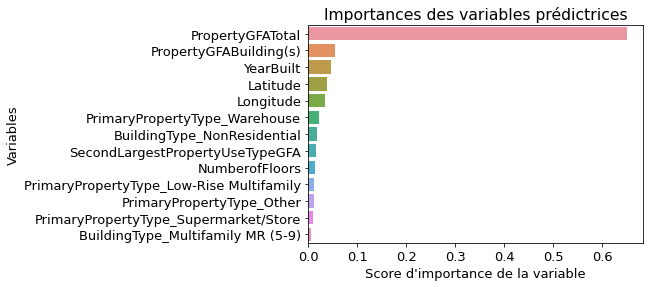

In [71]:
# Représentation graphique
sns.barplot(x=vars_imp3[vars_imp3 > 0.005], y=vars_selected3)
plt.xlabel("Score d'importance de la variable")
plt.ylabel("Variables")
plt.title("Importances des variables prédictrices")
plt.show()

In [72]:
# Modélisation avec les caractéristiques les plus importantes

rf3 = RandomForestRegressor(random_state = seed)

rf3.fit(X3_train[vars_selected3], y3_train)

rmse_test3 = np.sqrt(mean_squared_error(y3_test, rf3.predict(X3_test[vars_selected3])))
rmse_test3

0.41595149651189106

In [73]:
# Réglage des hyperparamètres
import time
start_time = time.time()

RF3 = RandomForestRegressor(random_state=seed)

RF_hyp3 = {'n_estimators':[200, 250, 300, 350, 500],
          'max_features':['auto', 'sqrt'],
          'max_depth':[None, 5, 10, 15, 20]}

RF_cv3 = GridSearchCV(RF2, RF_hyp2, cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')

RF_cv3.fit(X3_train, y3_train)

print(RF_cv3.best_score_)

print(RF_cv3.best_estimator_)

print("Temps d'execution de l'agorithme : {:.4} mn.".format((time.time() - start_time)/60))

-0.18846342236803265
RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=1234)
Temps d'execution de l'agorithme : 2.768 mn.


In [74]:
# Meilleurs paramètres
RF_cv3.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}

In [75]:
# Définition d'une fonction pour évaluer l'erreur quadratique des données
def model_evaluation(model, features, labels):
    pred = model.predict(features)
    rmse = np.sqrt(mean_squared_error(labels, pred))
    return rmse

In [76]:
# L'erreur quadratique des données d'entrainement
rmse_train_cv3 = model_evaluation(RF_cv3.best_estimator_, X3_train, y3_train)
rmse_train_cv3

0.14708195057027076

In [77]:
# L'erreur quadratique des données test
rmse_test_cv3 = model_evaluation(RF_cv3.best_estimator_, X3_test, y3_test)
rmse_test_cv3

0.39883788194872155

## Faire la prédiction sans " ENERGYSTARScore 3

In [78]:
# Features
X4 = df.drop(columns=['SiteEnergyUse(kBtu)','TotalGHGEmissions',"ENERGYSTARScore"], axis = 1)

# Variable cible
#y = df['SiteEnergyUse(kBtu)']
y4 = np.log(df['TotalGHGEmissions']) # J'ai d'abord faire ça le logarithme et les résultats n'étaient pas satisfaisants.

In [79]:
# La structure des données
X4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6654 entries, 0 to 6653
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     6654 non-null   object 
 1   PrimaryPropertyType              6654 non-null   object 
 2   Neighborhood                     6654 non-null   object 
 3   YearBuilt                        6654 non-null   int64  
 4   NumberofBuildings                6654 non-null   float64
 5   NumberofFloors                   6654 non-null   float64
 6   PropertyGFATotal                 6654 non-null   int64  
 7   PropertyGFABuilding(s)           6654 non-null   int64  
 8   SecondLargestPropertyUseType     6654 non-null   object 
 9   SecondLargestPropertyUseTypeGFA  6654 non-null   float64
 10  Latitude                         6654 non-null   float64
 11  Longitude                        6654 non-null   float64
 12  HasParking          

In [80]:
# Encodage des variables catégorielles
cat_vars4 = X4.select_dtypes(include=["object"]).columns.to_list()
cat_vars4

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'SecondLargestPropertyUseType',
 'HasParking']

In [81]:
# Encodage des variables catégorielles
X4_OHE = pd.get_dummies(data = X4, columns = cat_vars4, drop_first= True)
X4_OHE.head(5)

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,Latitude,Longitude,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),...,SecondLargestPropertyUseType_Residence Hall,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Senior Care Community,SecondLargestPropertyUseType_Social/Meeting Hall,SecondLargestPropertyUseType_Supermarket/Store,SecondLargestPropertyUseType_Swimming Pool,SecondLargestPropertyUseType_Vocational School,SecondLargestPropertyUseType_Warehouse,SecondLargestPropertyUseType_Worship Facility,HasParking_Yes
0,1927,1.0,12.0,88434,88434,0.0,47.612190,-122.337997,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1996,1.0,11.0,103566,88502,15064.0,47.613106,-122.333358,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1969,1.0,41.0,961990,961990,100000.0,47.613349,-122.337699,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1926,1.0,10.0,61320,61320,0.0,47.614216,-122.336609,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1980,1.0,18.0,119890,107430,68009.0,47.613754,-122.340924,0,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
# Données d'entrainement et de test
seed  = 1234
X4_train, X4_test, y4_train, y4_test = train_test_split(X4_OHE, y4, test_size = 0.25, random_state= seed)
print("X4_train shape:", X4_train.shape)
print("X4_test shape:", X4_test.shape)
print("y4_train shape:", y4_train.shape)
print("y4_test shape:", y4_test.shape)

X4_train shape: (4990, 91)
X4_test shape: (1664, 91)
y4_train shape: (4990,)
y4_test shape: (1664,)


In [83]:
# Standardisation
scaler = StandardScaler()
scaler.fit(X2_train)
X2_train = pd.DataFrame(scaler.transform(X2_train), columns = X2_OHE.columns)
X2_test = pd.DataFrame(scaler.transform(X2_test), columns = X2_test.columns)

### Modélisation

In [84]:
# Essai de plusieurs algorithmes de machine learning
algos_ml4 = {
    "random_forest": {"model": RandomForestRegressor(random_state = seed)},
    "bagging": {"model": BaggingRegressor(random_state = seed)},
    "gbr": {"model": GradientBoostingRegressor(random_state=seed)},
    "ridge": {"model": Ridge(random_state = seed)},
    "xg_boost" : {"model": XGBRegressor(random_state=seed)},
    "svr" : {"model": SVR()},
    "lasso": {"model": Lasso(random_state = seed)},
    "knn" : {"model": KNeighborsRegressor()}
    }

In [85]:
# Appliquer la fonction prédict au jeu de test
for model_name in algos_ml4.keys():
    fitted_model = algos_ml4[model_name]['model'].fit(X4_train, y4_train)
    y4_train_pred = fitted_model.predict(X4_train)
    y4_test_pred = fitted_model.predict(X4_test)
    algos_ml4[model_name]['fitted'] = fitted_model
    algos_ml4[model_name]['preds'] = y4_test_pred
    algos_ml4[model_name]['RMSE train'] = np.sqrt(mean_squared_error(y4_train, y4_train_pred))
    algos_ml4[model_name]['RMSE test'] = np.sqrt(mean_squared_error(y4_test, y4_test_pred))
    algos_ml4[model_name]['R² train'] = r2_score(y4_train, y4_train_pred)
    algos_ml4[model_name]['R² test'] = r2_score(y4_test, y4_test_pred)

In [86]:
# Afficher les résultats des tests
algos_ml4

{'random_forest': {'model': RandomForestRegressor(random_state=1234),
  'fitted': RandomForestRegressor(random_state=1234),
  'preds': array([3.76637348, 2.29105001, 2.43483651, ..., 2.10108039, 1.23853417,
         4.04938869]),
  'RMSE train': 0.24857042451921602,
  'RMSE test': 0.6809229512962768,
  'R² train': 0.9728664136674381,
  'R² test': 0.7750426633993932},
 'bagging': {'model': BaggingRegressor(random_state=1234),
  'fitted': BaggingRegressor(random_state=1234),
  'preds': array([3.63651644, 2.32839752, 2.32581866, ..., 2.19417942, 0.83248938,
         4.04879821]),
  'RMSE train': 0.30337296662928454,
  'RMSE test': 0.7233774030234381,
  'R² train': 0.9595831885288788,
  'R² test': 0.7461167249400431},
 'gbr': {'model': GradientBoostingRegressor(random_state=1234),
  'fitted': GradientBoostingRegressor(random_state=1234),
  'preds': array([3.99646126, 2.45009856, 2.6727418 , ..., 2.86334849, 3.26767789,
         3.81702248]),
  'RMSE train': 0.846565676926085,
  'RMSE test'

In [87]:
# Meilleur affichage du résultat
results_metrics = pd.DataFrame.from_dict(algos_ml4, "index")[['RMSE train', 'RMSE test','R² train', 'R² test']]

with pd.option_context('display.precision', 3):
    best_print = results_metrics.sort_values(by='RMSE test', ascending=True)

best_print

,RMSE train,RMSE test,R² train,R² test
random_forest,0.248570,0.680923,0.972866,0.775043
bagging,0.303373,0.723377,0.959583,0.746117
xg_boost,0.402158,0.756916,0.928977,0.722029
gbr,0.846566,0.905597,0.685276,0.602100
ridge,1.082380,1.106527,0.485521,0.405943
svr,1.140278,1.144188,0.429008,0.364817
knn,0.917573,1.164077,0.630266,0.342543
lasso,1.285278,1.268775,0.274558,0.218960


In [88]:
# Modèle de Forêts aléatoires
rf4 = RandomForestRegressor(random_state = seed)

rf4.fit(X4_train, y4_train)

RandomForestRegressor(random_state=1234)

In [89]:
vars_imp4 = pd.Series(rf4.feature_importances_, index = X4_train.columns).sort_values(ascending=False)
vars_imp4

PropertyGFATotal                                         2.564706e-01
PropertyGFABuilding(s)                                   2.400239e-01
YearBuilt                                                1.189984e-01
PrimaryPropertyType_Low-Rise Multifamily                 6.386280e-02
Latitude                                                 6.136124e-02
                                                             ...     
SecondLargestPropertyUseType_Museum                      1.571187e-06
SecondLargestPropertyUseType_Other/Specialty Hospital    1.086568e-06
SecondLargestPropertyUseType_Enclosed Mall               8.187706e-07
SecondLargestPropertyUseType_Courthouse                  1.642123e-07
SecondLargestPropertyUseType_Pre-school/Daycare          5.062665e-08
Length: 91, dtype: float64

In [90]:
# variables dont le score d'importance est supérieur à 0,005 
vars_selected4 = vars_imp4[vars_imp4 > 0.005].index.to_list() 
vars_selected4

['PropertyGFATotal',
 'PropertyGFABuilding(s)',
 'YearBuilt',
 'PrimaryPropertyType_Low-Rise Multifamily',
 'Latitude',
 'Longitude',
 'SecondLargestPropertyUseTypeGFA',
 'NumberofFloors',
 'PrimaryPropertyType_Warehouse',
 'PrimaryPropertyType_Other',
 'PrimaryPropertyType_Office',
 'PrimaryPropertyType_Hospital',
 'PrimaryPropertyType_Hotel',
 'PrimaryPropertyType_Mid-Rise Multifamily',
 'BuildingType_NonResidential',
 'PrimaryPropertyType_Supermarket/Store',
 'SecondLargestPropertyUseType_Office']

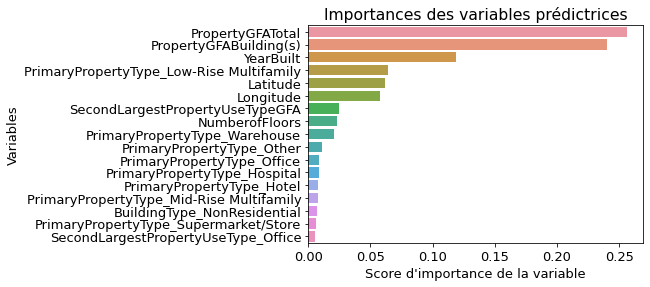

In [91]:
# Représentation graphique
sns.barplot(x=vars_imp4[vars_imp4 > 0.005], y=vars_selected4)
plt.xlabel("Score d'importance de la variable")
plt.ylabel("Variables")
plt.title("Importances des variables prédictrices")
plt.show()

In [92]:
# Modélisation avec les caractéristiques les plus importantes

rf4 = RandomForestRegressor(random_state = seed)

rf4.fit(X4_train[vars_selected4], y4_train)

rmse_test4 = np.sqrt(mean_squared_error(y4_test, rf4.predict(X4_test[vars_selected4])))
rmse_test4

0.6849859739313644

In [93]:
# Réglage des hyperparamètres
import time
start_time = time.time()

RF4 = RandomForestRegressor(random_state=seed)

RF_hyp4 = {'n_estimators':[50, 100, 200, 300, 500],
          'max_features':['auto', 'sqrt'],
          'max_depth':[None, 5, 10, 15, 20]}

RF_cv4 = GridSearchCV(RF4, RF_hyp4, cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')

RF_cv4.fit(X4_train, y4_train)

# print(RF_cv4.cv_results_)

print(RF_cv4.best_score_)

print(RF_cv4.best_estimator_)

print("Temps d'execution de l'agorithme : {:.4} mn.".format((time.time() - start_time)/60))

-0.504026428420974
RandomForestRegressor(max_features='sqrt', n_estimators=300, random_state=1234)
Temps d'execution de l'agorithme : 2.714 mn.


In [94]:
# Meilleurs paramètres
RF_cv4.best_params_


{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}

In [95]:
# Définition d'une fonction pour évaluer l'erreur quadratique des données
def model_evaluation(model, features, labels):
    pred = model.predict(features)
    rmse = np.sqrt(mean_squared_error(labels, pred))
    return rmse

In [96]:
# L'erreur quadratique des données d'entrainement
rmse_train_cv4 = model_evaluation(RF_cv4.best_estimator_, X4_train, y4_train)
rmse_train_cv4

0.2419326119128971

In [97]:
# L'erreur quadratique des données test
rmse_test_cv4 = model_evaluation(RF_cv4.best_estimator_, X4_test, y4_test)
rmse_test_cv4

0.6678099187239563